In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TSML

In [2]:
def ReLU(X):
    return X*(X>0)

def deReLU(Z):
    return Z>0

In [3]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

In [4]:
def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

In [5]:
data=np.random.randn(2000,2)
data2=(25./100.)*np.random.randn(1000,2)
data3=2.3*np.random.randn(3000,2)
data4=6.5*np.random.randn(4000,2)

circle=np.array([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.0)])
circle2=np.array(data2)
circle3=np.array([[x[0],x[1]] for x in data3 if (np.sqrt(x[0]**2+x[1]**2)>5.50)])
circle4=np.array([[x[0],x[1]] for x in data4 if (np.sqrt(x[0]**2+x[1]**2)>10.50)])
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
data3=np.hstack((circle3,2*np.ones((circle3.shape[0],1))))
data4=np.hstack((circle4,3*np.ones((circle4.shape[0],1))))
X=np.vstack((data,data2,data3,data4))
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

In [6]:
colors=["red","blue","green","purple"]

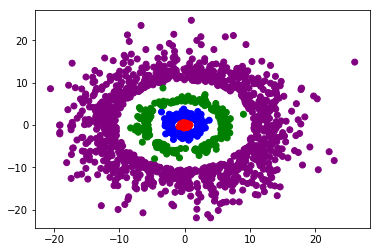

In [7]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[y.reshape(-1).astype(int)])

In [8]:
#Make this unecessarily complicated, hopefully to prove the point
nodes=[16,8,6]+[4]
activs=[ReLU]*3+[softmax]
deracts=data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXwAAAD8CAYAAAB0IB+mAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzsnXd4FNXexz8zO7vJpieEEiAQegdBuiBVQEREEcWKYhcretX36vXea/d6VewFQQERBKRJEem9EyAQQgshgTTS67bZef8YWFl2N9lNNgQu8/Hx0Uxmzjm7mfnOOb/zK4KiKGhoaGho/O8j1vYANDQ0NDQuD5rga2hoaFwjaIKvoaGhcY2gCb6GhobGNYIm+BoaGhrXCJrga2hoaFwjaIKvoaGhcY2gCb6GhobGNYIm+BoaGhrXCFJtD+BioqOjlbi4uNoehoaGhsZVxd69e3MURalb2XlXlODHxcWxZ8+e2h6GhoaGxlWFIAinvTlPM+loaGhoXCNogq+hoaFxjaAJvoaGhsY1gib4GhoaGtcImuBrXJOUZpeSeSATa5m1toeioXHZuKK8dDQ0ahpLqYVFDyzi+Irj6Aw6FLvCwH8NpO/LfWt7aBoaNY42w9e4plj6yFKOrziObJaxFFuwllrZ8M8NJP6WWNtD09CocTTB17hmMBWaSFqchGyWnY5by6xs/WBrLY1KQ+PyoQm+xjVDeV45ouT+li/OKL7Mo9HQuPxogq/hE7JVRrbIlZ94BRIeG44U4LptJYgCzQY1q4URaWhcXjTB1/CKkswS5tw6h/eC3+PdoHeZMWgGeSfyantYPiFKIiOmjEAfpHccEyQBQ6iBAf8aUIsj09C4PAiKotT2GBx0795d0XLpXHnYZTtftvmSwtOF2G12QJ0VG6OMPJf8HAGhAbU8Qt9I2ZDClg+2UJBSQNMbm9L/7/2JiIuo7WFpaFQZQRD2KorSvbLzNLdMjUo58ccJSrNLHWIPoNgVrOVWDs09xPWPXV+Lo/OduIFxxA2Mq+1haGhcdjSTjkal5J3Ic2u3t5ZayTmSUwsj0tDQqAqa4GtUSv1O9dHpdS7HDSEGYrrF1MKINDQ0qoIm+BqVEjcojjqt66AL+Ev0RUnEWMdI+zvb197ANDQ0fEITfI1KEQSBCRsm0O2xbgRGBmIINdDp3k48tusxpEBtG0hD42pB89LR0NDQuMrx1ktHm+FrXFXYzDbO7jpLzlFts1hDw1e09fg1SFlOGfHT4zl3+ByNejWi8wOdrwpf+oTZCSx7ahmCIGC32YlsEck9v99DRFPNh15Dwxs0k841RvahbKb3m45skbGV29AH6wkIC+DxPY8T2jC0tofnkYz4DKbfMB1buc1xTBAFIltG8kzSMwiCUIuj8z+KorDnmz1sfm8zpdml1O1QlxGfjtDiBzTcopl0NNyy5JElmAvNDuG0llopPVfKn3/7s5ZHVjG7vtzlkuVSsSuUpJeQvjvd7/1Zy61s+3gb33X7juk3TOfArAModv9OjjL2ZbDowUX8NPAnNr+3GVOByfG7Le9vYfXfVlN8thi71U7W/ix+ueUX0ral+XUMGtcWmknnGsJabiVjb4bLccWmcHzZ8VoYkfcUny12K7iCKFCaXerXvmSrzE83/kT24WzHizHzQCan1pxizIwxfunj8LzDLHl4CTaTDcWucHbnWfZ8s4cn4p8gICyALe9vcanGZS2zsu4f65iwdoJfxqBx7aHN8K8hRJ2IILo3fVzsY38l0uqWVkhBrvMT2SLTqFcjv/aVtDiJnKQcJ/ORtdTK4fmHOXfkXLXbl60yy55chrXM6niJ2Uw2SrNL2frRVkqySjyuJs4dqn7/GtcumuBfQ+gMOlqPao2od/6zS4ESXSd2raVReUfXh7sS1ijMye9fH6znhldvILhusN/6Kc8r58QfJ7CUWFx/KUDqltRq95GTlOOUl+gCskXm2NJjFX6eOm3qVLt/jWuXapt0BEGIBWYCDQA78L2iKJ8JghAF/ArEASnAXYqi5Fe3P43qcev3tzJj0AwKUgpQFAUUaNi9IQP/NbC2h1YhhhADj+95nF1f7uLIwiMYo4z0eq4XrUe19kv7Z3acYcnEJeSdzEOxKepU6BJNFnUiIfVDqt1XYEQgdqur4AMYo4xIgRK9X+zNjk93OJl1JKPEoLcGVbt/jWuXanvpCIIQA8QoirJPEIRQYC8wBngIyFMU5QNBEF4DIhVFebWitjQvncuDoigkr05m09ubOLvrLIpdIaJZBKO+G3VNFgIpTC3kq/ZfYS21ej5JgKC6QUxOm4zOUH3z1/QbpnN211mnmb4+WM+YGWNoP7Y9il1h63+2svU/WzHlm4hqGcXwKcNpfYt/XnAa/1t466Xjd7dMQRCWAF+e/3egoigZ518KGxRFaVPRtZrgXz7m3DaH5D+TsZn+slPrg/Q8uvNR6nWsV4sjc8Zus2Mtt2IIMdSY6+Wa19aw49MdbjOCSkESAgKhjUIZv2Q8ddvV9UufJZklzL55NrnHcxElEZvJRt+X+zLo7UEun9Mu2xF1mvVVwzO1kg9fEIQ4oCuwE6ivKEoGwHnRd6sigiA8DjwO0KRJE38OR8MDhamFLmIPahTrto+2+c0TpTrIVpk1r6xh7/d7kS0yoY1CGfnlSL+ZcC4mJynHrdjrQ/QMfHMgrW9tTZ02dfz6wglpEMIT8U+QdTCLkswSYrrFEBQd5PZcTew1/IXf7iRBEEKA34AXFEUp8vY6RVG+VxSlu6Io3evW9c/sSaNiClIK3HrlKLLiFy8Uf7D8qeXs+W4P1jIrdpudwtOFzL97fo34oTfp1wTJ6MYDyCyTMDeBubfN5c+X/vS7+ydA/c71aTGshUex94XyvHJ+f+J3Poz6kA/rfMjyScsxFZoqv1DjmsEvgi8Igh5V7GcrirLw/OGs86acC3b+bH/0pVF9ottFYzPbXI6LepHGfRrXwoicMRWYOPjzQSe3SABbmY2ZN83kl1t/4czOM37rr+sjXQkIC0CQ/prBC5KAYlfI3JdJ7rFcdn21i2+v+5ay3DK/9etPZKvMtD7T2P/Tfkz5Jkx5JuJ/iOfH/j/6PWBM4+ql2oIvqOvcacARRVE+uehXS4ELESITgCXV7UvDPwTXDabrw12dinkjgN6op+9LfS/LGGSrzNndZzmXeI5L95GKzhZ53Bi1ldk4vuw4MwfP5MSqE34ZizHSyON7H6fzvZ0x1jES1jgMAQFF/mtcdoud8rxydn25yy99+ptjvx+jOKMYu+WvTWDZIlNwqsBv35PG1Y8/Zvg3AA8AgwVB2H/+35HAB8BNgiAcB246/7PGFcLIL0cy6O1BhMWGERAWQOtbWvPozkcJbxJe430nLUniv/X+y8whM5naYypftfuK3OO5jt9HxEW49VO/GGuZlZXPrPTbmMIahTFmxhheyXmFMTPHoA/Wu5wjm2VOrjrptz79Seb+TCzFrrEDVpOVrANZtTAijSuRam/aKoqyBfC0mzWkuu1r1AyCKNBnch/6TO5zWfvNPZbLb/f85mSuyT2Wy4xBM3jh9AuIOhFDsIG+L/dl+8fbXdILXEx+cj42k83vRVhCY0Ld+8kLEN605l+IVSGqZRSGEINLwJjeqCeqZVQtjUrjSkPb/teoMgWnC/h17K+8F/we/6nzH/58+U+s5RX4sgN7v9/rKqYKmIvMpKxPcRwa+O+BDP9kOBHNIjxOJySj5Bef+EuJbhtNvY71XCKS9UY9fV70/IIsOlPEvDvn8W7Qu3wQ8QErnl3hPmK3Bmh/Z3v0wXqn1BmCTiAwPJA2oyv0hta4htAEX6NKmApMTO0xlaOLj2Its1KeV87ur3YzZ9ScCq8rOlPk0VxzsReMIAhc/8T1PJ/8PCM+G+G834CaDqLbI9085gaqqP/UramU55VXeN49y+4htm8sUqCEIcRAYEQgo38YTaOe7vP2mIvNTO0xlaTFSdjKbZgLzeybuo9Zw2a57FHUBPogPY9sf4SmA5oiSiKiJNJscDMmbptYIy9FjasTLVumRpWInx6PpcTi5AFiM9k4s+MMmfszaXBdA7fXtRrZimPLjrlEtdqtdpr0cx+H0fOZnhSnF7Pzs50osoJskbHLdvZ8twdLqYVbvrkFnb5iUbOWWVlwzwJO/nkSKUDCZrLRY1IPhv13mFv/+uC6wTy04SGK04spzyunTps6FfZx8OeDmIvNThu9slkm62AWZ3acIbZPbIXj8weRzSKZsG6CI75CqzescSnaDF+jSqTvTndxmwR1byArwfMmYYe7OxDVIsrJ710frKfrI105s+MMO6bs4MzOM06zYkEQGPr+UIa+P9Qxo7db7aqf/C8JrH5ldaXjXf70cpL/TEY2yZgLzchmmb3f7mXvt3srvC60YSj1Otar9IWSsTfDfWoGRS06czmRAiVN7DXcogm+BnbZTvKaZA7MPEDusdzKLwDqdarnVlQURaFOa88ZHaUAiYnbJjLorUHEdI8hblAcg98ZzOFfD7P00aWseW0NM4fMZM6tc5CtztGvOz7b4RodXG5j3/f7KvTqsZlsHJp7yOVaa5la5MQf1OtUz236ZkEUKvw+NDQuJ9o04BqiJLMEc7GZqBZRjplyQUoBPw34ifL8clBU8W9/Z3vG/DSmQvt4t0e7sfU/W9UArvOTcZ1BR3TbaI927gtc8MLp+7Lq8/9V+6/UgKbz7chmmZT1Kez5dg+9nu3luK7snPugJ9kiYy23eqzLaymxONq+lMps+d7S5cEubHprk7rqOd+XaBCJaBZB0xub+qUPDY3qos3wrwFKskr4acBPTImbwnddv+Pjhh9zfIVa4Wre2HkUnSnCUmzBUmLBVm7jyMIj7Ju2r8I2g+sFM3HrRGL7xCKIAqJepN2d7XhwzYM+5ZzJP5VPQUqBiyBby6zsm+o8hoY9G7ptI7RRKIYQg8c+jHWMhMS4SWss4LcascZII49sf4S4AXEIuvPfx+3teGjDQ/9z9XY1rl60Gf7/OIqiMGvYLHIS1aIbslnGWmpl/rj5jF86Xo10vST03lpqZc83e7j+sesrbLteh3pM3DoR2SKrIleFJF92m92jIF5qphn6/lCm9ZnmMt6ez/SsUFQFQWDUt6OYN3aeo6SgqBfRG/UM/WCoz2P2RJ3WdZiwfoL6mUTBZw8iDY2aRpvhX6EoisKpdafY+PZG9v2wD3ORuUrtZOzLIP9kvot4WsusbHlvC4LOvShVmBv+EnQGnddibym1cHL1SdK2paHYFaJaRhFU1zVxmGSU6PxAZ8fPdpudze9vdpsXZseUHZXmi2k5oiUPb3mY9ne1p0HXBlz/xPU8efDJGrGvi5LnUpIaGrWJNsO/ApEtMj8P/5n0PelYSi3og/T8+fKfTFg3gZhuMT61VZxe7FGMUzakuDWF6AJ0dLi7A6XZpSTMSaDsXBnNBjcjblBctcwTB2cdZNmTyxAlEUVRCAgL4L4V93Hb9NuYNXyWWmnqPCENQuj9fG/HzwvvW8jRJUfdtmsuNJN9KJv6netX2H9M1xjunHMnAGW5ZRyac4jijGLiBsTRfGjzCkU6/1Q+G/61gZT1KYQ0CKHfa/1od0c7Xz6+hkatown+FciuL3dxZucZh9vjhdn2vDvn8dzJ53wS3YbXN3SbGRNAsSvYzDakIAnFpvq364P1hMeG07BHQz5r/hmKrGAz2dgxZQdN+jfh3t/vRZR8XxhmH8rm9yd+d3LltBRbmDl0Jg26NkAQBZSLDPklmSWc2XmGZoOakXs8l6O/H/W48WopsbD1P1u55etbCAhzv3F7MWnb0vh5+M/YZTu2chu7Pt9FzPUx3L/qfqQA10ei4HQB33f73uFnX5RWxKIHFpF/Kv+yJZvT0PAHmknnCmT/T/vd+riXZpWSdzwPUE0+e6fu5euOX/NJ409Y9uQyijOKXa4JbRiq2uI9/KWlQInbpt1G31f60vn+zoz8ciSP7X6MJQ8vwVpqdbgyWkutpG5O5cCsA1X6TBcKmVyKrdxGyvoUpyyPF45v/c9WADLjM13SHFzK4XmH+bH/j9jlipOuKXaF+ePmOzaoQX1hpO9OZ+/37n3yt7y3BXOJc1CVtczKhn9uqDDXz9WIpdTCqXWnSN+TflkihDUuL9oM/2rj/OR+5bMr2f/jfofgxE+LJ2lxEpMSJ2GMMjpdMuLzEaRtTyNjb4ZLc3abneh20TQf2hzJKGEINnBmxxm34mwttbL/p/10fbirz8MuyylzEswLKHYFURLdJisrSlXr6EQ0i3B7rdPnsNrJT87n5KqTtBrZyuN52Yez3e6HWMusHPjpgJMb6AVSNqU4mZsuIIgCucdzadDFfVSxJxRFIXVzKikbUwiuG0yHuztgjDRWfmEVKcspY81ra0hckIioE+l4b0eGvDvEZTUUPz2elc+uVE1udoXgesHct/I+LY6ghsk7kUfq1lSC6wXT4qYWVVpBe4sm+B6w2+yc3nwaa5mVpjc29ejjXRN0ndiVta+vxVbmPMsPaRBCVMsoijOKiZ8W7xRIZLfZMRea2f3Nbm58/Uan6yzFFuIGxZF1MMtJWAWdQHDdYH4d+yvFaerqoOXNLen5bE+PYxPFqt2MbUa34ejSo64pFWT3XjqiXiRucBwADbs3pE7rOmQnZFcYYGUps5C5P7NCwRdEweMG74UNbGuZlYQ5CaRuSiWqVZTb6mCgrkJCGrhx96wAu83OnNFzOL1Jvbf0Rj2rX1nN/X/cT2xf/6dfkC0yP/T+gcLUQsffft/UfaRtSePxvY879i3S96az4tkVTvecpVQ1ub2Q8oK2CV0DKIrC8ieXc2DmAVXkBTCEGJiwfgLRbaJrpE9N8N2Qvjed2TfPRjars1zZKjPyq5FVmtlWhR5P9+DYsmOc3XkWa5kVySghSiLjFoxDEAQy9mWgC9C5Rp2aVPPIxYKfvjed6TdMd3wWUEVPMkqENAihOL3YyXx0fOVxSjJL0AfrXfKr64P1dHusm3OfZhun1p3CZrLRbFAzAiMC3X6mdmPbseuLXWQeyHSIvi5AR89nehLaMJT1/1jvWK0IkkBAaAD9XutHWW4ZRxYeoe0dbSlOL6Y0y3OZQUOQQc2u6YGjvx9l+dPL3Zph9EF6uj3ajbLcMqb2mEppdinWUitSoORxDwQBl9KEil1xpJc4MPMA1lIr7e5oR7MhzRAEgfgf4zm98bRjDBf+O2/sPCafnex3YT2y6AilWaVOL3rZLJN3Io/ktcm0uKkFAHu+2YNsumRVp6hJ8lK3ptK0vxY85m8OzTnEwdkHnZ5jS4mFubfNZdKRSTUSv6EJ/iXYzDZ+HvazSwTmikkraNi9IfU7VewJ4g90Bh0PrH6A0xtPk7o1ldCYUNqPa+9YZYQ3CXdrAhF0AlEtnHOfzxg0w0nsQRWl9uPaExAWwJ5v9jj9zm6xk52QzajvRrF80nIUu4LdYkeURFrf2pqO4zs6zk3dksovt/6iihxChS9GnV7HhPUT2PTeJja/s9mRBG3HlB0M+OcAxs4Zy9YPt1KcUUyLm1rQ/43+ZB3IYv64+SCoM2N3Zqa/Prw6O2p3u3vPmbRtaSwYv8Bl1YSopj1uPqQ5XSd25Y8X/6DobJFjT+HSl+qlmAvNBIQHsPm9zez4ZAemAhPBDYIx5Zuw2+wossKBmQdofWtrxv4y1skMdzGWEnV14qsXVmVkxme6TdFsM9vIOpDlEPzSrFK3Kx9BEFyeBUVRkM0yugCdFlRWDXZ/vdvV/VmBorQico/mEt3W/7N8TfAvIXl1sluzgWyRif8hnhGfjbgs4xAEgbiBcW4jQet3qk/dDnXJ3J/pJPxSgESvF/6yQaduTXVbBQng6JKjNOrRyO2LQ5REAsICmHxmMkd+O0JZbhlxA+NoeP1fka7WMiu/3PKLiz18xaQVxPaJdXuzCjqBbR9u+8ser6iF0ze8uYE7f7uToR8OpehMEY16NsIYZWT+XfO93hRt1LsRY2eP9Zg0bPO7m13FHtVEdfeiu1W3TEHgyG9HXDaQPaEP0mMttzJv3DxSN6c6vsvSTOdViLXUyrHfj3F08VGKzhR5brCK2mkqMFGcXkxEswj0Ruc00nVa10Efosda4vw9SoESUa3+mhy0ua0Np9adcvm+bWabk6lpz7d7WP/mespzywmKDmLQW4O4/omKA/Q03OPp3hZ0QqV1JaqKJviXYC4yu/VOUGRFzTdzhXDfyvtYeP9CUtanIIgCxigjo6eNpm67uo5z8pPzPV5vM9locmMTTm867TKLlS0yDa5rQEBoANc9dJ3b648tP+b2e5KtMvt/2u+IYM0/lU/6nnTCm4STEZ/hcca8YOwCh+nKbrWrxdS9EEDJKNFhXAfGzBhT4XkXl1C8GH2QnpD6IWQnZLPx7Y0e8/W4u67F8BZ80fKLSlcBoIr+oocWuX3pABhCDT5v/trMNpY9sYxDcw+hM+hQ7Ar9/96ffv/XzzHz7nB3B9b83xpsZTbHDF7QqffLxXsdne/vzK4vd5F7PNcxRn2Qnv6v9ye4bjAA+6bt48+X/nQIVWl2Kasmr0LUi3SdeHnMnf9LdLynIzlJOS4eeTqDrtKYkqqiCf4lxA2Mc2s60AfraXPblVM5KKhOEPevvJ/yvHIsJRbCYsNcltexfWNV0XSzRxnTLYbuT3Zn52c7ka2yY9atD9LTflx7t7VtFbvC8ZXHSVqcROHpQrcrIcWmYCowYZftLJ24lMPzDjvESJAqVvCLb/y0bWlOfvkXYwgzYC2xEhAeQK/ne7lsUl9KVkIWhmCD2+9CtsqU5ZYxZ9QcdVblrksR6rSsg2xVi4IHRQfR8/mebHl3i1diD4CgzujcefuAuqqaNXwWN7xyg8PM4g5TgYnyvHLCm4Sz6sVVHJ53GNksO8x2m9/dTFjjMLo82AVQE9U9uv1Rlj6ylNObTyMIAs2GNmP0D6OdUj5LgRKPbH+E+OnxJM5PxBhlpMekHjQf0txxjjs31AvuqZrg+07PST059Mshco/nYi21qhHrksjts26vUpoSbxCuJF/b7t27K3v27Kn8xBpm41sb2frhVocA6IP1NOrZiAf+fKBGXaZqgp8G/MTpTaedjgmiwNOJT6PIChnxGRxdcpSU9SkYQg30nNSTXi/0crnhFLvCr7f/yql1p1SbsAh4sHz0fLYndVrXYc2ra5wFwsPLxyMeztcH6R1/h3Hzx9FimKtAlmSVcPLPkxyed5jkNcmqIF7algD1O9fHWm4l71hehePQGXQMemsQfV7qg6gT2ffDPlY+t9JtvITbJirwDrr0s9308U30eLKH03FLqYV5d8wjeW0yok5ECpKwllrdmuSi20Yz6cgkl+M2kw0E3AaXecO/xX+7/XsIosCb8ptVavNaR7bIHJ5/mOQ/kwltHEq3R7sR2SzS53YEQdirKEr3Ss/TBN89KRtT2Pv9XsxFZjqO70iHuzpUWgTDFxRFuSwbXjaTjT9e/IP90/cjW2Si20Vz8xc3s+7v68g+lI2oF5HNMj2f6cnQ/wz1OKakJUksun+RVzVajVFGjNHGikXUC4LqBqlVtc5v8LpDF6DjqUNPUaflX77iu77YpRZFEfBakL1BCpKYuGUiMV1jWHDPAg7PPVzh+fogPQiqObBe53qk70n3+JK8GEOIgb+d+5tjP0KxK0yJm0JRWgX2/4sIjAzk1bxXvTrXFz5r/hkFpwpcjke2iOS5E8/5vT8N7/FW8DWTjgfiBsQRNyDO7+3mJ+ezfNJyTq05hagX6Ti+I8M/HU5guHt3xqpSnldO5oFMQhuGMuqbUdzy9S2gqLOxWcNmkRGf4TQ73P3Nbup3qU/n+zu7bS9xXqLXBbmtZVbEIvcrIVHvPsjqUi4UDml1cytOrj1JaUYpucdyXWbJslnm6/ZfM/jtwdzw6g1kH8pm9aurvTe1+ICt3MbBmQcJbxJO0qIkj+eFxYYxfMpw7FY71jIrLYe3pPRcKd91+867jgTIScpxlIncN22f12IPgALLnlpGUWoRoQ1D6TGph8eSk75w039uYvGExU6rNskoMfRD/2Uc1ahZNMG/jJgKTfzQ6wfK88pVd0ebnYTZCWQdzOKx3Y/5ZcavKArr31zP9v9uRxegw261U79zfe75/R7MxWY2v7uZ5DXJrvnnS63s+HSHR8HXh+i9NksIOoE2o9uw/8f9LuLureArdoW0rWmkbU2r9Fy71c7GtzcS0z2Gk6tOVuy+WR0UdRN663+2OlZG7ihKK2L+nfPpOrErt35/K4IocHDWQa/NWXarneB6wY6f46fHez7ZjdnLVGBylG4URIGDvxzk1u9u9fi39Zb2d7ZH1Ius/b+1FJwqIKJ5BEPfH0qb0VfO3pZGxWiCfxk5MPOAunF3kWjKFpmcpByOLj2K3qgnolkEdVpVPZQ9cX4iOz5VSwFemOWm701n9i2zyUnMwWrysDGJ5+pPiqIQERfhcRP1YvRBeno934vez/fm+PLjmPJN6oxQB8h49FKpLtZSK7u+3EVYo7BK0zBUh6NLjyLoBI+brw4UNd1FdNtoottFs/GtjV4JvqATCIwMZMH4BbQY1oIek3pgKjB5Pv/CS9hD24pdwVZmY/nTy2l/Z/tq17pte1tb2t7WtlptaNQemuBfRjLjM9363tpMNubfOR99sB7ZIhPbN5bxi8dXWMXJE9s/3u6avsBqJ313eoWCI+pFWo1yn5Jg9cur2fPdHs/2Z0GNjtUH6On1Qi8G/XsQgigwKXES8dPjiZ8WrxZa8WnH1neK0oro9Wwv9v+036d8/j6hULnYX8Tm9zfToEsDr+MJFFmhJLOEkowS0ransfGtjRWmk/D25SYIAhnxGcT28X/6Bo2rh6vL5eQqp0HXBupG3iUosuLIhWMrt5G6JZVlTy2rUh9F6R5svRXoghQoEVQniPqd6zO1x1Q+bfIpSyYuoeB0AUVnitj19a4KBdQQbODhjQ/zav6r9Hmxj1qfFggIC6DTvZ3IO5HnlSmougiSQNwgNbf95ULQCR6LyICaxyjvhI+b1xfi0myKav7y9NX58PTabXavUkdfSu6xXObeNpcPIj5gStwUr4rNaFy5aDP8y0iXB7uw6e1NjjJ7npDNMonzExn9w2hL4dlzAAAgAElEQVS3LnSmQhM6vc7p5WEz2Zgzeo5LlKcDDy6Ogk6g3//1Q7bIrHpxlUPYD8w8QNLiJAa/MxidXueaZ+UirGVWZg6d6ThHkASi20Rzx893kHUw67K5spafKycjPoOBbw9UA8N8mIlXFUVWKhTeOq3rcC7xXI30LSB4tWoSRIHwpuHUbV+30nMvpjCtkKk9p6rR1IqaRmLd6+vIPZ7LLV/d4nSutcxKaXYpoQ1D0Rn8582m4V80wfczOUk5JC1OQhAF2o1t55TbxlRgYsCbA0iYnUD6nnREvejR5VCxK9jKbU6Cn74nnSUPLyHnaA6glu0b+O+B7P1+L4nzEzHlm9y+SERJpMmAJqSsTXH5XYdxHegzuQ8f1fvIyYVRkRUsJRZ1g7cSLtiJHT9bFLITsvnxxh8Z/unwKqcM8JX85HymXj8VRAgICcBqsnqdJqFaVNDFucOVi70uUIc+UI+l1OLVhvYFvJ1ph8WGce/ye312CtjxyQ7VFHVRN9YyK/un72fgPwcSXC8Yu2xn9d9Ws+fbPQiCutoZ8I8B9Hm5j5Zn5wpEE3w/sundTWx+d7P60ApqZOLQD4fS89meLH9qOftn7Fd9+RWIiIvgwXUPsurFVSQtSnJ5eCObRzplniw6W8SMQTOcXCNPrDzB8eXHHb7enhAl0aNJJmNfBul709HpdS4+63arnXNJ5wgMD1T79XHCLFtlziWeQ7bWkNeMJ+xqigzRICIaxMsj+tUgqkUUT+5/khmDZpC6JdWvbeuD1ELt5XnlJC1OIqR+CG3HtHWsDmWLTMqGFKxlVuIGxjndc6nbUt2+gHQBOs4dOUdwvWDW/2M9e7/b63TvbPjXBoLqBXHdBPdpOTRqD03w/cS5xHNqgq6Lbny71c6aV9dgt9k5+PNBZJPsMHvkn8pn3th53Dn3TkfSKtksI+gEpACJW7+/1an9vd/vdRHOijbzLsZmsqmbtm7IPZbLjCEzEBT3s7HcpFx0eh2B4YHIFnV8giAQ2TKSzH2ZFfdbZmPnlJ3oDDpkLrPoA6JOJCQmhIJk12ChKwlzkdmR/vrzFp/7dcNZsSts+WALecfzsNvs6Aw6VkxawYT1E7CZbfwy8hfHfSRbZEZ8NoLrH1eTodVtV5eMvRkukwnZLBMRF4FdtrPz851u0y1semeTJvhXIJrg+4nE3xI9+n/vmLLD5SFWZNXsIepFnj78NDs/20na9jTqtq1L78m9XQog5BzJ8ej37Q2CKHheBch4tgUrqhAgQrNBzRj474HUbVeXj+p95FW/dpvd6xeTv7GV2654sRd0As0GNwPUFMlN+jXh5KqTfmvfLtvJPZbrmIhcuEfnjpmLqcCEudA52+kfL/xB4z6Nqd+pPn1f7kvi/EQnQdcF6mg2pBkRTSMwF5s93pMe95I0ahXNS8dPCKLg0WbpsYCGqD7koTGhDP1gKA9vfJhR341yW+0m9oZYtx4+3qAL0NGkfxOkoIrf74JOQNSLbr1OZJNMyvoUwpuEqxlFNU8NvyDqRbo/2V0tlH79917tmXiLIAkEhAe4TS9RdKbI7X0pW2RHNbW0bWlEt41GH6xH0AnoAnR0HN+RcfPGAWoKiOD6wS5tgOqRdqE9c7FrSUmN2kETfD9xIQrRHR3u6uC2TJ6tzMbOz3Z6lQbguoeuq5q3i6Daca976Dra3dEOKVDyWLJPEAV6T+7t8fe6AB2FqYWc2XmmwtVGQFhAzXhqiBDWJMz/7dYisklmWp9pTO0xFUupxa9BY6JOJDDKfcoORVbcel4pskJxejHf9/ieVS+uImNfhlr5K0DixtdvZMyPYxwTD0EQGPHZCOeJyPn7bcA/B7Dw/oW8H/o+/4n6D193+Jq0bZVHTWvULH4RfEEQpguCkC0IwqGLjkUJgrBaEITj5//rewq4q4joNtEMemuQKqgGHboAHVKgxIgpIxj89mC19qmbBcCBGQdY+MDCStsPDA9EH1zBDN/DX1IQBaxlVlZMWsHpDad5cP2D9J7c2/35ChyZf8RjwjHZLBPVMorlTy2vcKyyVa6RjdrY3rE8nfA09bvUfNUxvyOAaPD8uJWdK6uyG6mnOADZLFOcWuzxBe62LUngyMIjnDt0zsmUYy2zsvm9zZTllFGcXszJ1SfJO5lH+7HtGb9kPLH9YgmJCaHlzS15aNNDbHpnE4kLVDOn3WbnXOI5Zg2bRd7J6iXU06ge/rLh/wR8Ccy86NhrwFpFUT4QBOG18z/7P4XfFUTfl/vS7o52qlumTqDd7e0IbxKOtczq4t52AZvJxvFlxylOLya0Yajbdk0FJspyyhwBTS4IcM/Se1jz6hoKThUg6kV1GX2+opQsq/nSLSUWVr+0mh6Terh1JbTb7BSmFbodpyiJ9Hi6B4IgUJpdsX3WnxkqLxAQFsDdi+4mIEytdbv00aXO+yLCeZOUKKovGw/aGRYb5lsiMj8g6AQMoQbMBVU3bQiSQFijMMxFZtWkJqv1BSSDRK/nerHlgy1ur7OZbGqdXC9SUwuSAHbP7p6iQWT+3fNJ25aGFCAhW2SaDmjKXQvuYuLmiY7zcpJySN+V7rIKlC0yOz/byc2f3+zTZ9fwH34RfEVRNgmCEHfJ4duAgef/fwawgStc8Mtyysg8kEl4bDh1Wlctn01k80j6TO7jdOzQr4cqDK3XBejIP5XvIvjWcitLH1nKkYVHECXR43I/snkkrW9pTetbWpN9OJusA1ksvH+h6wOuqL78B2Ye8DgWT37gddrWYcgHQ1j14iqf3DMFXQWbxV4SFhvGPUvvcSQU63B3B3KSctj64VbVA8giE3tDLHf9dheB4YEsfngxh+cedjKVSUa1/OPgdwbzSaNPfNpU9DZpnNtrz3/+6og9qFG3pdlq3VlBEBAk1aZ+z9J7OP7H8YqvtSuO78nzQNVALrvd8wa7bJZJ3ZqK3Wx3mINS1qfwQ+8fECWR8Mbh9Hm5D5YSi1vzpt1qr7EgNA3vqEkvnfqKomQAKIqSIQhCvRrsq1ooisKaV9aw68td6ALUB6Nh94aMXzIeY6Sx2u3nHs2t0NVONstuN2qXTFzC0cVHnSoaXYoUpJqNUremsu2/2yg8XVjhDFdBUWd8PiAZJTrd24kZA2eQtt03O2xVxT4wIpAG3RrQ6/letB3tnKxLEAQG/msgvV/szbnD5whtGEpEXITj9yO/HElpVikp61PQBeiwmWx0urcTg98ejCiKjPh0BEsfWepVfhvJKNFqZCu3sRIVIUoiiqL49PlFg4ghyIDNbEM2y2oJyYsud4mTsNmZOWSmd3s7lf3JlcoDuexWu9v01OcOqSKetT+LU+tOMeBfA9x+t7oAnVq6UqPWqHW3TEEQHgceB2jSpEmtjOHAzAPs/ma3U4bJMzvPsOiBRdy77N5qt1+/S30MIQa3+eR1ATq6PtKVoOggAM4dOce+7/dRmFbI0SVH3bo0BkYEIhklottEM/DfAylMLWTB3Qu8ErCwRmH0eLoHJ1ef9MpmLOpFAiMCSZid4FXUqD8whBgY8dkIR5k+TwSGBzoV2HZcH2zgvhX3kX8qn4JTBUS3iyY05q/VU8fxHQmKDmLjWxvJOpiFbJGRLbKLOOsCdcQNjGPsL2PZPmU7a19b6yTAklEibkAcJ/886SKEVXFFFQSBjvd15Mz2M5XGOPjal7GOkZL0kgrP8ST4gk4gNCaUsryySrOdWsusrP/Heuyy65j0QXp6PtOz0rFq1Bw1KfhZgiDEnJ/dxwDZ7k5SFOV74HtQK17V4Hg8sv0TNxkmLXaS1yRTnl9OdkI2Wz7cQuHpQuIGxtHvtX6ENfbeW6TdHe1Y9/o6bGabk8lE0An0fbkv/V/vD0DC3AQWP7i40vD6gIgAXjj1AqBukM69ba7X2RhHfTuKuEFxxA2K49TqU5WeX79zfbo91o1Vk1d51X5VsGNnX7d92PQ2OhzrQOPQxnS4q0O1241sFumxXFzzoc1dkqyV55dzctVJ8pPzMUYZadSrETFdYwDo90o/GnVvxOpXVpNzJIewxmEM/PdA2o9r7yj9aC21IkoigiS4L6lYCbJZZs9X/q/4pgvQ0ea2Nhz48YDPhWGkQIlbf7iVTvd0Yu7tczn2+7FKP5e71aggCnR7tBsh9UN86v9Ssg5mkX0om6hWUTTs3lBL3+AjNSn4S4EJwAfn/7ukJjrJOpjF5vc2k52QTUy3GPr9vR912/mWJKo8130eeFEnsv+n/ax/Y71DUHOP5ZLwSwJPxD9BWOMwTvxxgtTNqYQ2CqXTvZ0IqhPk0o4UIPHozkf58+U/1UpJgurVcy7xHNs/3c6OKTvo/UJvtny4pdJZt6ATaNq/qePnvBN5Xs8mRb2IqdDExzEfqw9+BXVpL2Art5GxN8MveewFnUDL4S3JOpxF0Wl147S8Tjlzbp/D2QZnERSBtcPX8vngz6udt70qGCONdBzf0ePvmw1uxuN7Hnc5Pn7xeE7+eZKkJUkEhgfS+YHOfNvl2xrNy18Rol5ECpCwlFjU+BBR4MiCI76npxZg4taJxHRTX3rD/juM1E2palS4j0VmFLvCmR1nfOv/IqzlVubeNpe0rWnqvohdoV7Hety/6n6/V4v7X8YvNW0FQZiDukEbDWQB/wQWA/OAJkAqME5RlAp9snytaXt682lmj5jtyD4p6ASkQIkJ6yfQqEcjr9tZ+uhS9s/Y7yK2wfWDsZltLhtugk6g032dyDuWR/ahbCwlFiSjhCiJPPDnAzTuXbGdcufnO1n797VOqwpdgK7SSFpBJ2AINvD43seJaqkmZSvJKmFK0ymVR+EK0GxIM1I3pfr8sIbEhFCSXUJ1syNIRokn9j1BdNtoZIvMgTMH6DenH+U25xduoBRIyvMp1A+5Ct0vzzP9hum15nd+wU3z0heOZJQIDA/EVGRypF2+UIHM06Shboe6jPpuFE1uUM2tRWeL2DllJ8dXHCfnaI73LzUBOt3TiTtm31Glz7T86eXs/W6vk9lJZ9DR/q723DGram3+L+FtTVu/+OErinKPoigxiqLoFUVprCjKNEVRchVFGaIoSqvz//W7A+6KZ1Y4VZBSZAVrqZVVL/hmfhj474EYI4wOf2VBFNAH6Rn070FuzSuKrHBs6TEyD2Q67PK2chuWYgsL7l5AZS/Rze9tdjEhVSTYgiQQFhtGx/EdncQeIKR+CHED4xD0npe2ugAdxigjGfsyqlT+ryTDd7GPbBlJYGQgAWEBGMIMSEaJW765hei26ua0zqDjt1O/YZFd9zVEQWTp0aU+j/NKYuzcsa6eKpfJ+qDI7jeLBUHgxjdu5PHdjzMpcRJvWN7g9bLXaTumrceN/HOHz/HzsJ/JPqxaZMMahXHTRzcxdu5Yt6m71Y5wURa9Ua2EVhVsZpuL2IPq5pk4L1GL+vaBWt+0rSp22U52gtttAc7uPutTW2GNwtR8Np/v5NT6U0S1iKLP5D6ENwln5fMr3V5jM9vc+puX5ZaReyzXrdcNQGl2KaVZvuUZaTqgKRPWTHD7u6SlSWTEZ6BYPd/0gijQ45kebHp7k0/9VpUmA5pw92+qz3zKhhRsJhtxA+JcCnAo5/9xR01Xx6ppwmPDeWz3Yyx9ZCkZ8RmIOpH249pTr2M91r2+zmf7vj+wllspzSl1yYs/5P0hnFx9Uo30dWNStJltbP1wK7fPvN1xrH6n+tTtUFe99y69RlHvOTFQVCOuFbjlq1to1NP7VffFVOQhJVtl7LIdnajl4PeGq1bwBVE1b7jzfAmM9N2mF1wvmMHvDHY53mpkK46vOO40A9cH6QmqG0Th6ULXhhQqdJNb98Y6n8d2YVP3UnZ/s5sVT6+o9HpbuY1tH22r1F5fHQSdQKubWzHsk2FONXlb3NTC4zXj2o9jyo4pLiYdu2Ln1ta3erjq6qFBlwY8vudxbGYbok503Betb23Nj/1/rLZvvq8Ygg006deErIQsjJFGh+NBVMsonjr4FKsmu0/VrcgKyWuT+bTJp5gKTDTo1oCB/xrI6GmjmX7DdCzFrs+gZJQY8I8BNBvSjHod63leDXjBhdWFO8Jiw9SU4xpecdXm0hEEgR6TeiAZnW8kfZCe3s/39ls/Y2aMofmQ5kiBEgFhAeiD9Nz4jxvp+3Jft8nMAsID2PXFLrZ/sp3Sc64z+aRFST71rw/WE3djnMtxU6GJlc+6X324o6aKhwuigD5Yz9APh3LP7/f4VIC9a0xXJveZjFEyohN0GEQDRsnIZyM+IyY0pkbGWxtIAZLTJKB+x/q8lv8awz8drh734ik0Rht9zyN0kZVGH6wnsnkkv97xK9P6TuOLVl/wY/8fKclSXTXDm4Rzyze3uE//IEBJZglFaUVYii2kbkxl5qCZfNvlW7diD2pRebtsp+H1Dasl9qCmafaUOLDPS33cHtdwj182bf2Fr5u2slVm2RPLODTnkGPTs+sjXRnx2QhEnX/fZcXpxRRnFBPdNhpDsAHZKvPrmF9J2ZiC3WpHNIiOClXWMqvbTVxToYmPG3zs3jVOVIXhYjORZJQY/ulwuj/huhcT/2M8Sx9ZWiumgQsYQg1MWD+hwgfSGw5nH2bJ0SXoRT3jOowjLiLOf4P0ExbZwkdbP+KHfT9gls2Maz+Ofw78J1HGqMovroDcY7ls/3Q7Z7afUVNgu9ljEUSBiVsn0rB7Q5Y/vZx9U/d51XbbO9qSsTcDfZCeNre1YdtH25xt+wLEdItx8jz6/YnfSfg5wWs334ro8lAXxvw4ptrt2Ew2vmj1hVqv+cIqVVBfUs+deO6yldC8kvF20/aqFvwLlOWUUZBSQGTzSIxR1Y+M9RZFUTi76yxpW9NI257G0aVHXaorRcRF8FzycwiCwDddviH7oOvyVNAJNL+pOQPeHMCaV9aQdTCLsMZhDPjXADqMc/ZHt5ZZObHqBEcWHCFhbkKNmmkqQjJKPL7vceq29c0FtrYos5ax9OhScstyGRg3kA71fPPzHzZrGBtTNmKxqzNavainaXhTEp5OIFCqvlug3WbnvzH/pTzH1UW45zM9ufmLv/LPrHxuJbu+2FVpm7oAHYpdUfPe2GS32TEFncBTB59y2PXtsp0t729h5+c7MRWYqNOmDnkn8iqsaeyJgIgAXst/DVAnZ5n7MzEEG4huF+2z/3xxejHLJy3n+LLjCKJAm9vaMPLLkY50G+5Q7AonV58kfU86EU0jaDe2HXpj1ScmVzLXlOBfCUyJm+LWpi/qRSYdmcT2T7az52v3ny0gPIBnjj7jEpRyZOERVr+ymvzkfEIahNDxno6O2Z1dtteYmaYiBFEgtl8sd82/q8KHrTYot5Yzdd9UZh+cTZAhiKe6P8W49uPYl7GPoTOHIisyVrsVAYHxHcczbfQ0r4Rn3al1DJ051GUjOVgK5ptR3/BAlwf8Mv7ULanMvnk2iqIgm2VESaTNmDaMnT3WxYvmizZfkHfMP45v9/1xHyH1Q9jy4RZyj+XSpF8T+r7cl/DYcPJO5PFFmy+qNrEQ4E35TY4uPcqSh5Zgl+0oskJY4zDV/FeFfFUX9Kqyv5ul1MKMgTPIScrBWmZFH6RHMkpM3DrRJ7Pj1YK3gn/VbtpeaXgK3rJb7ZRkllS4DG9wXQMXsT+27BgL71/oMPGUZJSw45Md/huwl0S2jFTT7KYXYwg20Pdvfen/9/4+5+OpaayylQE/DeBg5kHMdnUzdHvadtYlr2PpsaUUmJ0rX807PI8RLUdwV4e7Km37jXVvuPUaKrWVsiVti98Ev0m/Jrx45kUSFyRSnltOsyHNaHh9Q5fzSjJL3DsMVJHiM8XMu2OeI54lOyGbAzMO8Njux6jTqg5hDcMoOuN7hlFBEDj480GWPbHMyVSZezyXGYNn8MLpF3w2vXq7Mtj0ziayD2U7zKeWEguWUgsL71/IYzsf86nP/yU0wa8i5mIzB38+SOb+TBS74tnmKcDZXWfR6XXuUyaI0KS/aw6htX9fWyNphr1FCpIwBBm4b/l9RLWKwmZS9yeuNKG/wMIjCzmQecBhcgEwy2a+2/ed2/NLraW8velt3t38LunF6fRq1Iv3h7xPp/qdXM7dl+H5Zd0ysmX1B38RgeGBdHukW6Xn+XNlvuGtDU73r91qx1JsYe3/reWuBXdx57w7+bHfj25dIwVRUF+Gbm5txa6w5CE3AfaKWsc3ZX2KS3oLf5Hwc4LrXpkCGXsymD1yNu3uaEen+zr9z5p4PKEJfhUoSClgaq+pWEutlRac1hl0hDQI8VikQmfQ0etZ14CU/JP5fhlrVYhoHsGAN9X9gwubsVfig3E89zivr32d/Vn7KbeWO4m9NxzOPuyYua84voINKRvY8egOSiwlvLbmNfZn7ic2PBa74tmeMaGL+/iImiSkQQh1WtdxZKmsDi1GtiBlTYrL8Qv274M/H6Rhj4bc9PFNrHl1DYpdcfjdB4QF0HJkS+q2q8uW97e4dUaoKCiqsroK1cHTC1GxK5xYeYLTm06z87OdPLLjEQzBhhobx5WGJvhVYPnTyynPKa80wk8KlGjUq5Ga08TNUlTQCdy77F63tvDIFpEeA8tqmjqt6nDdhOsua5+J5xI5nH2YttFt3c6yFUVh4+mN/HHiD6KMUTQNb8q9C++tUIwr42IzjYJCmbWMZ5Y/w46zOzDLqlmoMLsQ0YPfpCiI2Gtp1/zOOXfyTedvqu6lJajxAGN/Gcv7Ie+7PcVSZGHJxCWOlak+RE/L4S3p8lAXWg5r6ShjmZWQxaZ3fAvqs1vtNOlXc9lxO93XiZ2f7fQYwW4ttZJ3Mo893+6h70t9a2wcVxqa4PuIoigkr06uPJxbUD0Tzuw8Q8beDGSrjCHU4BB+2Soz8uuRNB/ivKTNO5HHvmn7CKob5Fq0QlSLVNRoKLkAPZ7uUWPNK4rCyhMrmX1wNqIgcnfHu/l85+dsSd2CJErIikzXBl25qflNJOcn07txb+7tdC8PLXmI1SdXU2otRS/qsdqr7zboMjYUNqZudDnuSdQFBL7Z/Q3/HvRvv4+lMup1rEf/v/dn20fbfEqXIRkl7l91PzHdYjAEG0haUnFcyMVmSGuJleMrjhMRF0GbUW0AyD+Vz/S+0yvN8HpxIRx9sJ5uj3YjvEm41+P2lQH/GEDy6mTyjue5Dc4ENSAxcX7iNSX4mpeOjyiKwrvGdyvOfaNTS8pdGnIuBUncOedOEHCbauDo0qMsuGeBmszKancUY7mcvvZtbmvD3Yvu9mva2bTCNLambSXaGM2shFn8lvgbpVZ1Oa8X9dgVO7Li/H3qBB2yIhOsD0YSJUosJS7nXAmEGkI5O/ksoQGu5SkVRanR9L2KXWHdP9ax5T335Q3dMeidQdz4+o2Aakf/OOZjn33uJaPE2F/Gsve7vaRsSqnUW0wfpOe6h6/j7M6zGEIN9JjUg3Z3tKvx1MZ22c7JVSc5tuwY8dPi3b4YWwxvwf1/3F+j47gcaF46NYQgCHS4qwMHZx/06KqmyIrbRFmiTsRmtrn41gMUpBYw/675Ti+SSjNg+oPzq4aGPRoy/NPhxPZxLShSVRRF4aU/X+Lr3V9j0BmQ7TLltnInU4qnmfoFcb/wYrhSKbeWMy1+Gi/0fsFxLPFcIk8vf5rNqZsJ0AXwYJcH+XjYxwQb/OvGKogCQ94dwr5p+yjL8lDv+BLWv7GegtMF3DzlZpIWJ1Up1t5us/Pbvb955VSgD9bTamQrbv7iZp8EPnlNMpve2UTB6QJi+8Yy8J8DfXbjFHUirUa2ouXNLTm19hS5x3OdJk/64GuvIIsm+FXg5s9vJnl1MiWZHioIeSoYrbivGZu+N52fbvzp8gg8aim9mOtiaNirIYHhgXR5oEuVa/hWxKKkRXy/93vMstlhE/9fw6bYeGvjW4xrP45GYY3ILMmk77S+FJmLUFAot5UzY/8MjuUeY90E3/MoeUP7O9qz5xvvV8bxU+NJ3ZxK+7Htvap6dikXVqCV0XJES7o+2pV2t/s2mz8w6wDLn1zuWHkUpRVx7PdjPLrzUZ9rXYA6Sbt3+b3MHDKT8vxy1dxqken9Qm9aj2rtc3tXM5rgV0JOUg5HFqlFxNuPbU9k80gCIwJ5MuFJPm38qXuRVtSUxpc+THabnRbDXZOJLXloiV9C2b1FEAXuXnI3oQ1czRD+5KvdX11xM3QR/2+05pvy6TOtDyefO8m3e77FZDM5rWJMsomdZ3eSkJXgdkO6usRc73veodykXLZ9tM1tKcKK8Lage502dbhv5X0+j8su21n14iqn5+FC2vP1/1jPXQsqj5twR1TLKJ4/9TypW1MpO1dGbN9YQhpUr/rW1YiWhKICNr61ke+6fceGNzew7o11fN3ha3Z9rYa0B0cHc+MbN7r1SxckgXrt6yEFnX+fCmrE7bCPhyFKIqYCE6DWzV3xzArOJVbNvS4gPIC4wXG0vrW1w2PCK+yQMDuhSn36QrG5uMb7uICAgCRIhOhDMIgGF88aSZCICoxiVOtRBEmuVcmqS05ZDkuPLiU+M97takYSJZJyfEuc5y2Nejaq0pMsW2T1/vXhWl1g5feZIApOqZR9oTi9GGu56+RHsSukbkmtUpsXj6tp/6a0u6PdNSn2oM3wPZJ9KJstH2xxslPasbP6pdW0Hd2WsMZhXP/E9Wx+d7OL/7FOr2Pk1yNZcPcCSq2lanI1ncgfL/zBHy/8AYAxyoi5yFz14CpBzW9+dudZNRTfB08N2SJTfNZ7MV5+bDlvbXqL0wWn6dmoJ+8MfofO9Tt7PN9kM7E3fS/9YvtxKPuQS/pjbxAQMOgMlZqCJFEiUAqkXnA9/rjvD04VnCIpJ4kOdTsQbAjm4+0fk5yfzOC4wUzuM5n6IfX5LfE3psVPQ0EhuySbxHOJTj78kihxY5MbWZ+y3uu8/GbZTGJOIuL5fy5dRZhtZtrXbe/z9+AN9TvVp2H3hqTvSvf5WodzgBfmxLqd6lKYUkmEr+rocb0AACAASURBVABDPxxa5dz3xkijxypaoQ1rdkV6LaB56Xhgw782sOmdTW7LxN300U30nKRu9hyac4glE5eoS11FAQUGvzuYrINZJPyS4JWts0p42ifwAn2InrGzx9JmdJtKz/0x/keeWfkMZday890KBEqBbH9kO10adHE5/9dDv/LY748hCAKyXcYqW9GJOspt5UiChCiKCAiVCrlO0PHp8E+ZcWAGR84docz216ZkoBRI78a9eajLQ9QJqkPdoLr0bNTTyU584ABs2gT16sHo0WD0kFOv2FzMhMUTWHF8BZIoESAF8NmIz7i/8/08uexJvtvrPlL3UoL0QYQFhFFoKnT7ghMFkQFNB/DD6B+Ye2guG1I20CqqFc/1eo420ZX/HSoj72QeX7b9sko2eW8RJAGdXlfhJEU0iIyYMoIeT1XdtXfxw4s5PPew00RKH6RnzIwxtL+zZl6aVzta8jQfMBWa2PbRNhLnJ6IP1tP9qe4Uny1m07ubXF0rjRLD/jvMyVe99FwpSYuTsNvstB7VmvDYcN4Pe99jrvDaRGfQEdMthoe3PFxpHhPZLlP/v/XJLc91+V1MSAyHnjrErIOzWHVyFU3CmzCixQjuXXivi+BFBEYwtNlQGoc35rFuj/HBlg+YnTC7wqCpEEMI+a/mIyDw+7Hf+f3Y74QZwhjXfhx9Yvt43AS02+G++2DpUvX/9XqQJFi/Hrq4vp8c5JXnkVeeR1xEHJKoLnwVRWHsvLEsSlpU4ffkLXpRj4CAKIqYbCYkQcIgGVgyfglDmw+tdvvz75pP0qIkr4va1xS6AB1PHXyqyo4ANpON3x//ncPzDjuKmwx8ayB9XtRy33tCE3wvsZZb+a7rdxSkFDiWtfpgPc2HNufknyddZjNSoMSzJ54lrJFajKL0XCkJsxMoPltM0wFNaXlzS0SdeEUKviAJDP1gKD0n9UQKrNyal16cTsvPW3o0yYQHhGOVrZTZytAJ6oPpzldeJ+j4auRXPNH9CcexH/b9wNPLn3brlhmkD2Jy78m8Pfhtbz+agylT4NVXwXLJVx8XB8nJUBXX74VHFjJ+wXiXsQoI6ESdalKrRoxAbFgsp184XW2/dNkis2jCIg7PPVytdvxBdLtoJiVO8vr8kswSMvdnEtY4jHod6wFQnl9OaVYpEXERXt2v1zKXtYj51cyhOYcoOlPkZMO0llo5ueokPZ7ugRQooQvQoQvUIQVK3Pz5zQ6xT9uWxufNP2ft39ey7b/b+O2e3/ix34/YTDY63NXBffWgWiS8cTh9X+rr9cMTGRhZ4e8LzYUOU4usyB5FT1ZkJq2YxILEBY5jj3Z7lB9GziJMrIeoqHl6RESCpCBe6PVClaJXp02DyZNdxR4gOxsOHar4+iNHYNgwCAyE6Gh44w21rTva3cEvY3+hblBdgvRBBOgCGN1mNLmv5KIX9dUOCDtXeo5dZ3ch26vXjs6gY+zssVUq8elvCk8Xqn7vlaAoCn88/wdT4qawYPwCfuj1A1N7TqUspwxjpJHottGa2PuRa36G/9t9v3HoF1clMIQYGPn1SGL7xJK0JAlREml3RzvCY9VwcEVRmNJkikvaWMkoMeitQXR9pCvT+06n6GwRltLzClSLK21dgI7+r/dnwD8G+HTdpOWT+HrP134ZQ5ghjNxXc5FEibNnoWdPKCi0UyZmYJRCCQ41s3VdOK1b+J7MKiMDmjcHk8nzOQEB8Pzz8MorUOcSa8OZM9ChAxQXw4VHwmiEUaNg3jz1Z9kuk1qYSkRgBJHGSCyyBeO7xmrl87mAUTISbAhmyogp3NfJd3fGi1n5/Ep2fV55gZSwJmEUpfqe9tgbDCEGJm6dSP3O9Ss8L/7HeFY+u9IpCaGoF2k2uNn/RATs5UKb4XtJRFyEe5dGAcIahRHVMoq+L/Wl9/O9HWIPqn9+eb6rqcNWbuPgrIMYI408degpxv4ylsHvDOb2mbfT5+XasUGKBpHYPrHc8MoNPl87ZcT/s3fe4VGUXR++Z2ZnN5ueQAihJNTQe++9CSggIDaKIqAoCoqv6GvvWD5U9FVRRFCKgmBDQXon9BY6JCEJCQnpyWazZb4/RhY225OAqNxeXrq7M89MdmfOPM8pvzOHCP+K6WplMBuIz4gHVMObng5FhSLkV8eQHUxWcgTTptob+1OnYOtW1RBfi8UCv/wCr78OS5fC4sVXDbUrjEaYPVudvTdrBi1bqueRnAwffqg+LK4dw2BQYwEHDqivJVGidlhtwvTqykcraWkS4VvnLFcYzAYyizKZ9PMkNiVs8nn/i/kX2Z28m2xDNp2md0LSeU6frNywsm/pvK5w4onS+GuIaOL5utk9Z7eD4qzVZCVhUwJFl72rHr6F9/zr10ptHmrD7jm77dIaBVFAH66nVs9aTvdRFIWETQkusxWu9NgUJZHYIbG2ar7m9zZn/7z9GHNvQNWppM6ymoxsQqsHWlGjU40y+YhlSWb1vavpuaAnRrMRs2JGK2kpsfgen7AqVkL9QgH49VfVaNt9boV169T/ZmbC0KFw5Ahotapr5cUXVf98bi507QqJiVBYqAZlnblx3HHFvRMfD4sWQWys8zGMRnUl0qABLFwIrUtJ1f9v8P/ou6gvxWY3SwsfKDIV8ebWN+lZq6dX2xebixm7ciw/n/wZnUaH0WLkkbaPMH3rdL4b/p3b9Nvs89k0uasJhxcdLvsJC+Bf2R+TwYSpwIQgCQii4HWTHGeTJlDvHWOeEf9KFV8z8W/m1gy/VihjfhpDYFQgcoCMxk9D1VZVGb95vMsLdt0z61j71FqnFYeyv0yria1cHq/FuBYVM6vyhAVKcks4tuwYYXXCyhUQbFm1JYemHGJKuyl0i+5Gn9p90Gt87x0cWymW6BBVEldy8RWIohpYHTFCnVkbDKqBNxjg+edVV0zVqnDsmDrrt1p9N/bXYjJBdjakpakPDmeYzerxevZUYwHX0iW6CwcmHyAmJAbB2VS3DCTkJHi97RO/P8HPp36m2FJMrjGXYnMxn+77lFXKKmYkz2BK/BSnM3AAS7GF4QuHE9nCvdvFHRo/DRN3T6TL010QZVG9ZxTY8NwGlg1f5rGSN3ZILKLsaIZ0ITpCY0LLfF63cM6/3uAD1OlThxnJM5i0bxKPnnqUSXsnubzY8lLyiPswzqlCoKSVqNO3Dm0eauPyWH3e6IO+0o1rtG4xWzjw1YEy7bvjwg5aftoS7ataWnzaAlmUWT56OQk5CT4XUwVrg1l3/zrb6zFj1Jn7tciyauiTkmDfPtUYX4vJBFlZjq6XiiAxUTXs7jCZYP58x/cbVm7ImWlneK//e9QKrVUuwy8JEl1junq1rcli4utDXzusLopMRby38z0AqjSs4vRaFiQBs8HMnFpzKMoom+skIDKASfvUe2Xfp/tsGjtWsxVToYlz685x6OtDbsfo8UIP9OF6W2BWkARkf5nbv7jd7QpBsSqcWXOG3x7/jU0vbSL73F/XMOjvxL/epXMFQRSo3KCy220Uq8LBrw66nDFFd4tmzI9j3I6Rl5xHYcaN05exFFvIOu17s+vjGcfpt6ifreCq0FTIp3s/5ZvD35Bd7PvNdWnmJXSaq3LQ770He/fC2bOqoZVlqFEDPv5YNfharfsA7F9BcbEaU3CGRtQwvdN0pneaTlJuEu9sf4f5B+fbvj9vEAWRAG0Az3V7zqvtDWYDZqvzp9TlIjVDRhAEhi0cxreDvsVqsqquS0nVpynKLIJMr0/PDtlfZvjC4UQ0iiDtYBrGPEc3panQxIEvD9DqAdcr3sCqgUyNn8qeT/ZwfsN5wuuG0+HxDrbUTGdYLVaW3r6UhC0JmApMSFqJ7bO3M+zrYU6VaG9xlVszfC/JiM9gTswctr6x1anvXpAEIho7BqmsFqtdu7Ud7+y4vg1MSiEHyMR0j/F5v7e3v43RbH8TG8wGMooyXBoZd/xy6he71yEhqsvmxx/VQOqbb0J0NDRuDFOmqL7zmw29Hrp4EfeODonmg0EfoJN0nje+hgA5gPf7v8/EnyZS/6P6PPjjg5zPPu9y+yBtkM1Fdi0CAt2iu9lex3SLYWr8VOr0q6MGcytAlNVUZOLCzgsoiuL2evbmWteH6+n+3+6M2zCOofOGujX2APHfx5OwWTX2oNYfmA1mfpxwY0UI/47cmuF7gdViZWHfhRRcdCGHDGh0GqLaRPHdqO8oTC+kUsNKpO5JJf1wOhqthhbjWjDg/QGkH06/vumZErYbWtJKBEYF0uQu32c9h9MPV2jDkUuFju0aBQF694agINU/XvTnZLi0n/xmwWiE4aU0weLjVTdTq1YQcI3cfW5xrs9Kofkl+Uz8eaLt9fns86w4voL9k/dTJ8yx2bcgCHw6+FOGLR1m6zOgETToZT2z+8222zZxSyIJGxMqVIJ7x+wdBFYNpPXE1sgBskNnKdlfpsV4N+XNXnBu3Tn2/m8vxjwjTe5qQvP7m3Nk8RGnvaRFSSRxayL1BlRsY/l/Erdm+F6QuDnRZZs0URbRBmlpPKoxqx9ZzfHlx0namsSBeQdIP6gad3OxmYMLDvJZ689cjlNhWMAvzI/gmsG0m9qOh+IeKlMD8nbV2qERKmY+oBE1tK/uutHE009fNfY3M7IMv/2m/v+FC9C8ObRrB4MHq5o9n10juxOsCy5TYPtaLIqF/JJ8Xtr0kstt+tXtx7YHtjGqySiaRzZnQqsJHJxykCZV7B/yG5/fWOGzX1ORia2vbUWUREYvH402UItGr14z2kAt1dpWw5hrZOMLG7mw48/VgKKQdjCNCzsuYDa6XyluenkTS4ct5fgPxzm37hy/P/47X/f82mXSg4JyYxIi/sbcmuG7oTi3mJKCEgxZBpd++xqdajB6+WjmxMxxKyplMVq4fNJz5WFFYCoyMWzBMK/E0Vwxs8tMFh9dTEGJ61WNt3SL7kabaq4D2fv3l/sQblC4qjRXviwao1HN+Q8JUdNDT560Ty2dMQOaNlXdPpIo8Vy353hp80s++fFLY1WsHvPyW0W1YtnIZW63KV0gWFEUpBVgNVu5sPMC+nA9hmwDUa2jqN23NnEfxZG8OxlLiYWd7+8kpkcMmcczKbxUqKZvInD7/NtpfKejIFr+xXy2vbUNS/E1FfBFJtKPpBPTIwY5QHaY5Usa6bo2Rv8ncMvgO8GQbWDV2FWcXXsWQRTwC/dzkECGq82Y0w+le1QRvJFYjOoNVh6DXy+8HlsnbOXeFfcSnxlf5nFkUc3jd0e1apBXYfbIyli+5gk+JJaTFBDIJ0wmlRosZyQl+FGEP2U1/n/8oQqxFTrx1hgM8MEHV/38T3V+irPZZ/l83+deyyw7o1pQtTLve4WwumFlm3B4UGWNaBrB93d9z9nfz9pWEOlH0rl44KLdfqZCE2dWn3EYb+X9K6nStIpDwkTilkQkWbIz+FfGyT6fTZtJbdQuX6LqyhEEgbt/vtsmtnYL59xy6Thh8eDFnFl7Rg0GFZspSC0AK7blKqj+yYjGETS9qyn6cP0NDcR6Q1lT7a6lZdWWHJhygJrBNW3iaL6gFbU82OpB/DTutV1eeMG1fLG3aDDxjjiTvbTlCx6iFQcJwEAkGbzMa8xjCllU5jwxDGcFOoqR8P0BbTQ6N/agpoqmpV19LQgCE1tPxF8ue/GQn8aPWV1nlXn/K/R9u6/d9es1bi5rjV5Dh2kdOPPbGTt3kdVkdb1fqfetJiv75zku8fRhLi4IQV1VdJ3VlYePPMyA9wcw9POhzEidQc3OFdeP+Z/KdTf4giAMFAThpCAIZwRBeOZ6H88VqXtT+fWRX1k3ax2ZJ1znomXEZ5B+KB1riX1kVVEUaveuTaORjajdpzYD/m8AE7ZMQNJKVG1V9Ybm1ntCkARih1ZMr06tpGXngzvpX7c/GlGDJEheG//mkc15p/87Hre7+26oV444W5NKaRh0oTxlfZc2HEB2kYYiAFW4zA+M4gz1+JyHCC9rXqIT9Hq1Ovha2kS1KfMMXUDgzT5vckfDO8p9bg3vaMidS+5EG+y7TpGTE6Nyo8rcv/Z+JK3kUWbbHVazlfyLjtXAtXvXdh57UiBldwof1PqArLNZtJ3clqZjmqINqIC/61/AdXXpCIIgAR8D/YBkYI8gCD8pilJ2H4GPKFaFBb0WkLTlanu0HbN30O25bvR6pZfD9jmJOU5X+4pFoSS/hHt+ucfhs5TdKRSkl9/XXVFIeonOMzuXe5zMokx+P/M7WYYsXur5EqvuWkVibiItPm3hVeHVlglb0MueH4SFhXCijN3/2rSBuMiJiKt9W9HUIIUHWMDoJvGEHN+NtZyZU35+qmtq8mT79wVBYGKriTyz/hmf3Dr+sj+/3/s73WK6ed7YSzKOZXjdIEXUiEhayWmgV6PTIGklFvVfhKgRPQZf3SEHysQOdpyciBqRsevH8s3AbzBcNti5VC1GCxYsLB+9nKcuPYVGd8sz7S3Xe4bfHjijKMo5RVFKgKVA+acrPrDxxY12xh7Uh8DWN7aSfiTd7n1zsZltb2xzmvIFuCyYWjN9jYOv8a9kzKox5dIgURSFGWtmEPluJPevvJ/Hf3+cTl92ou28toTpw2hTrY1Xs3xve7gaDI66Ot4QGgp7NhYgrv7V953/JPBYHKm/lq0SOThYVdPs0EHV+dm3T32vNDnGHJ99+AFyAEcuHaGi1GzNxWa2vrnV60ydYQuHMWrFKOQAx1m2udjMpSOXMBvMlOSXeNVwRaPXENki0m48jb+Gyg0qu+xiVaVpFaYnTad6B9ftEhO3JHrx19ziCtfb4FcHLlzzOvnP924Ye+bucfq+YlE4tsy+UcSmlzeRsifF5ViXT10mP9Vx+Xlx/0WvzyckOoSotlFeb18W1j6x1uFh5gqTxcTy+OVM/306H+7+kCxDFgsOLmBu3Fw72V+rYuXopaOMXTmWbtHdvDJgH8V95NU5pKeXTSrh918tCD19k3t2RuSuHwlzL/1vhyColcCLFsHPP8OuXfDMM2r2jjPaRLUhUOtb0+yMogxm/jGTuXFzfdrPFXkpeV63xBQ0AvUH1adWj1pOtegFSbCPWXlIgJK0qjT35AOTGfHtCOoOqEuNzjXo+1ZfJmyd4DaV8oqQoUturtDZTc/1Xgs5uwzsfiJBECYBkwCioys+pcpkcD2jKS3sdGD+AY+FKZknMx2aKesr6d0WZV273ZTDU0iJS2HZsGXXrSrw0tFLfNnpSybtm+RWLiLfmE/n+Z1JyEmgoKQAf9mf5zc8T0RAhNNOVAoK686tY8P5DV5pwHvb0GPdOlW4rLR2jiesv61xrXXgC4GBGHyQBlIUVfztqaege3d1peGO2xvcTiV9JZ9TXItMRby8+WUebf9oubthBUYGel90pcCyEcvQBekwXHb8Ypw2GXdjeCWtRGitUARBoOEdDWl4R0Mvz1qlxbgWnF171mHlraCUqYr838z1nuEnA9eGzmsAqdduoCjK54qitFUUpW1ERMXorl9LdBcXDxFBlSu+Fm9uiEr1Hft0dnm6C7K/6+ImSSehDdYyftN4/EL8qNOnDtU72i90NHqNTVa5IjAVqkUx7nhj6xucvnzaZoiKTEXkleSRkJ3gch8Fxeug7YhGI7zaLihILWrylZ1z97pOmfGFMWN81u0xGFTNnzff9LytLMkEaAM8b+iEXKPzpui+knE8w2u3kmJRSNiYwMmfTpb7uKBOrJz56UsKS9j5/k7md53PkjuWcG7dOaf7N7i9AY1GNEL2lxEkAY1eg+wvM2rZqFvdsHzken9be4D6giDUBlKAMYBj1PM6MmjuID5r9ZmDMW85oaWDZkfskFiOLD7icrZSt39dgms4Omk7PN6BgrQCdn+42xbEqtmpJjHdY8g6k0WVplVo/VBrAiLUm37PJ3tI2WXvOlKsCoJGoAyZgi5J2p7k9vMlR5dgtDiK1ljciK2Igmhra+iJWetmeZVhMmIETJvm1ZB2HMqJoVgOwM9UjoD5K6+QH1KjTLsajfD99/D22+63i0uJszV+8ZUwv7ByV+yC2srT24BthSGqAd4R34zAL9Q+NddUZOKL9l+QfT7bVr9yft15uj/fna7P2KuFCoLA8IXD6TCtA2fXnkUXoqPJ6Ca2++kW3nNdDb6iKGZBEB4F1qCqvMxXFOWGdliOaBTBoycfZePzGzm3/hwBVQLo9WovGgxxLEpq+0hbjnx7xOk40d2iuWvlXU4/EwS1OXj3/3YnNymX4BrB6IJdC2ftfH+ngzvHYrQg6ST8wvwozq4YmUhPkgqy5Pu02pfGJ8cvHyclL4Xqwe7DNqGhamepYcMcO1u543tG8a7pKWQKkcrgzLX4B7C41vNMK4cn0d+L2Phb294q29iyP6/1fq3c7hzwTsTMF/wj/DFcNrgdt0qTKozbMA7/yo5f0oGvDpCTkGNXrGgqMrH55c20mdTGqd++WttqVGtb/iK0fzPXPQ9fUZTViqLEKopSV1GU16/38ZyRdyGPC9svYMgykBmfye45u52mUV4+eRmNv/NnYKXYSh7Tv7SBWiIaR7g19oAq1eAExarQ46UeCFLFNNLQhbg/j4mtJlbI7NEVAgIH0w56tW3v3pCRAT/8ANW9DOsb8Kcr29hPa0qQsQJWBI+m3wqsoytRxecYOxZycrw7Xmn8/VVlT0+cvnza97Flf17r9RqT2kwqw5k5UqePo/haefCmsK//+/0pyizi+1Hf83719/miwxc2N9HJH086jWFJWonkXclOx7vZihv/jvzjK21zEnP4ZuA3ZJ/LxlJswVJiIWFzAgv7LHRIefOv5O+0iESURQKr+pZl4Y6YbjFOw9nBNYNp81AbKsU6xgnKQu6FXLefT+80nS7RXQiQA9BJOp/lfD0hCAI1Q7yvfhQEVXO+Z0/vj3GKBrRnL1FcJIIM9BSyhv4Y0aCAw79HaEQARfRjCxlW9zK8rtBorjY4f/hhz9t3rtnZ56YoxeZintvwHMvjl5fpHEsT0zOmwiYSV3BngGt0qkFIzRDmtZ/H8R+Ok5+aT0pcCivuXsGe/+1R7ydn9S5WxaGI8dSvp/io/ke8Ir3C7Eqz2fb2tgpLV/238Y83+HFz4xxmEopZIftstsNMot7Aek5n8aJGdNvEwVf6zu6LNlBrC9IKotrlZ8inQ5D1Mo1HNfaqH6gnPOVHayUta+9by7qx63in3zvMvW2uRxkEX9CJOppHNve8Iaorp00bmDQJvv3W92NlUYksKlOCnkH8Tj/W8wazmMUbtGcXEiZELDTnGMX4URYtHVGETp3gk0/UnPtly1y3aryWGZ1m+JyHb1WsGMwGxq0aVyECdrognct894pG1ImM3zSeTS9swlRosnswmIpMrJ+1nrZT2jpIPQiiQECVAKq3v7rEO7/xPN+P/p6sM2oTH0OWgS2vbGHTi5tuyN/yT+MfH+I+t+6c0yCsudhM9tlsana6OgOVtBJjN4xlyZAlGLIMqtEVYPjC4YTV8SFR2wMRjSJ4+PDDbJ+9neSdyYTHhiPrZb4f/T2mAhMBVQIqZPnacJjn9DdBEOhYoyMda3QE1EydZ9Y9Q4mlxKUevoDglQEzK2aS85KpEew5KPruu3DmTEV1uRLYSne20r0iBrPRvbsqnOYrZ7LOlPmYGlHD+nPrK0Re4fYvbicnIYeU3c5rTQSNQKUGlcg8nlnmng2iLNJyXEskrUTS9iSn17G52Iy+sp5BHwzi98d/R9SIWC1WgqsHc+9v91KUUcTG5zdyfOVxjLlGtUvXNZiKTOx8fyfdnut2q8rWR/7x31ZJvusgo7NZdGSzSB5PeJy0A2mYi81Ua1vNo8a21WIl53wOuhCd15kDobVCGfzJYAC+G/Udx747ZgtgOSvuKgvV2/le4zatwzQG1B3At0e+5c2tb2JW7NOGdJKOcS3G8c2RbzzK/lqsFkZ/P5odD+7weNwlS26+loalqVG2ZB5yinMQBdGr2gVnSGLFKEBqA7VM3DWRV3WvOmhFgbrybf1gayxGC5tf2YzFZLFNlpzm3pdC9pcJrBpI79d7c+noJZfqsRajhSVDlvDgjgdpendTUvem4hfqR2TzSEyFJj5u/LEqu2xy830pahzBWdbcLVzzjzf4YXXDyD7r2INVkATC64c73UcQBKJae66GPbv2LD9N/Im8C3m2MWv1qsXIJSOdZiaUxlxsJu1QGqd+OuUwi7F5HMox0d/x3o4yuaIaVG7AK71eoWZITZ74/QkMJrWbkl6jp2pgVWb3m83iI4s9jmPFyoGLB7iYf5GoIPffp1/FeZKuC3o9jBtXtn3zjHllNvZWxUqf2n3KduA/yT6XTfyKeKxmK7W613Jq7K+w7pl1TI2fSuzQWI4tO4ZiVbh44KIqbewOAcxGMyWFJbwb8a5Hj1lOQg6rH1vNyCUjqdWjlu39Q4sOYbhscG/sUe+1gCq30jJ95R9v8Ns/2p6kbUmYi+xnG4FVA6nWpuwpXolbEll6x1I7USfFonB+w3kWD1nMxF1qq7qSwhL2fbaP4yuO4xfmR/tH21Onbx3WzlzLvs/2YTFZnOdHKxAYFUjhpUKvZlfOyE8u30rhodYP0SSiCR/s+oCLBRcZEjuEKW2nkGXI8jo9UxRFr1r9TZ7svPOVVqv6zv/K2b8oqrGFPl7Y3fPZ59metJ1tF7ZxIO0AJrOJA+m+afUICPjL/igoLB+13CsBOlfsmrOLP57+w6MBvYK1xMqx744REh3C2bVnMeYZvZr8oKjXf2F6oe212+OYrJz44QSKotilnV7YfsFjBbrsL9P1ma63uluVgX+8wY8dEku7Ke3Y88keNUgqgkar4d7V9/ocGL18+jInfzqJqBE5sviI06YoWCH9cDoZ8RmE1g7liw5fkH3uanFJwsYEIltEkn4o3W3DFEEUaDyyMWkH00jdm1qm5ioRTcpfudy5Zmc617RX3kzNT0WWZEqsno1+mF+Y036sXBE0igAAIABJREFUpZk8WfWPr16tZutIklqBu2ULWK1qJ6mS69wd0hmiCGvWQN++7rcrsZRw7w/3sur4Kgc3mK/IoszoJqN5t/+7hOudr0K94cLOC6yZscbnVeLhRYfJTcq1SRlkn3NcIVcEzvz7lRpUQtJJjlXvorryDqwaSLdnu9H24bbX5Zz+6fzjDb4gCPR/rz/tp7UncXMi+kp66vav63NnnC2vbWHrG1uxWqwIouBWHVPUiOSl5JG4JZGc847FJck7necZX4uiKGgDtfR4sQeHFh3i8NeHfTpfgMGfDvZ5H2+IrRRLsC7Y48zdX/ZnwbAFiILnZDCNBpYvhyNHYOdONRd/wAD1fVDFyV591VFkLTBQnf2by2FjxT9Pr7REskYDTzzh2dgDvLL5FX4++XO5jT1AibWE9ML0chl7gOWjl5fJJZh53L5HQEU2Pr+CIAnUG1jPoais9cTW7Ji9w+6YokYkvF44j8Q/UiFFaP9m/vEG/wqhMaGEjvWgcuWC9MPpbH1jq9ezbEuJBYvRwpbXtpRLIG3HuzvY9X+7nK8kPDBgzgCqNq9a5mO7QlEUdifv5sFWD/LezvcoNhc7ZOwICLSs2pLlo5c7zO4VRSGnOIdAbaDTSt9mzdR/7feBuXOdK2pGRkJWFmSXYxI6c6YakP3Pf666lLRaCA9X3UyuUBSFXGMueo2eT/d+6lSmoqwEa8sXjMw6m1XhPRoESSizexHULCDFrKh6OH4auszq4rBNUFQQ4zaOY9X4VWSdVlMxa/WqxbCvh90y9hXAv8bgl4ejy446BlVdIMoi1dtXZ/ldy8unhqmofk5vfa92CJB2MI0Nz29gz9w9GPONVGtbjdvm3lau0vRLhZfos7APCTkJCAhYFSt1wuqQlJuEgECJtYRAbSBRgVGsH7ueML2aynq56DIf7P6AhYcWkpKfgtlqRkBAFESaVGnCu/3epV/dfi6PazS6roZNTlbdPgMGlK1i1t8f6teHBx+EBg3gvfcgNRUGDYInnwRXen4bz29k0i+TSMxJRBREnyQnrsVZiqu/7M/ktpNd7OEdxTnFSFrJ9fXjoVetA5LqbslPyceY6/2D7Yq4WaORjTi79izF2cW26/qbft9w9893U7t3bbt9qrWtxiNHH6EoswhJJ6ELqtiCwH8zws1Usda2bVtl7969f/VpOLD+2fVsf3u7g89R0knognUUZRSpRSORAUQ0i+D82vMuxxJEAb8wP0wGk0MguSIJiQmh8FKh3apEDpCZvH9ymSt5BywawMaEjXbSyf6yP7O6ziJYF8zZrLN0qNGBOxvdiU6j3qSXiy7T4tMWpOanuszd99P48UznZ+hTtw/NqjQjxM9eWF5RVBfPRSdtB5o3h0OHVP/+fffBqlW+ySyHhamql4E+FFLvTt5NjwU9yj2j14gaXuj+Ah/GfUiJuQQFBZPFxLPdnuX5Hs+Xa2yz0czs8NkuJx36cD2iLF4NsnqBHCirD2qNSHFescdcfUkn8eCOBwmrG8b22dvZ+d5OB/dQULUgpl+YXiGFhv9mBEHYpyiKx8DGP77StiJoPKqx80YQgsCUQ1N4wfoC/y35L4GRgSRsSHA5jiAJhNULY+LuiTQZ1eQ6njHkJec5uKDMxWa2vb2tTOPlFueyKXGTg05+kamIBQcXMK3DND4Y9AH3NLvHZuwBZm+f7dbYgyoj8NKWl+j2VTdC3w6l14JepBdcbeAiCKoiZWmhMr0eZs9W/1+rVXP5H31Ufd/fX+0+9d576oNA42Qtq9HAjh3eGfutiVu5fcntBL0RRMcvO/pk7CVB4pWerzC84XD8JD+CdcHoNXpe7PEi/+3+X1JnpLJ05FI+H/o55584X25jD6pKZf3B9V1+3vLBljyZ+iRjN4ylzcNtvBrTVGCipKCE4lzPxh5Ug69YFfxC/Ij/Pt5pLKA4t9hWRXuL688tl44XRLWKouOMjux8b6e6RBbVdMOBHwwkKEpthnLq11NknclyKUF7JevmziV3IggC5ze4XgVUBM58rYpFIXVvqpOtPWMwG1zqwbgL3s4/MN9nWYFNiZvo9GUnlo1cRptqbRAFkfvvVw35889DYqLqfnnrLdWVcwVJgvffh9dfh8xM1b+v1ao+/u3b1c5aRUXqdlqtKtTW0EMxck5xDi9tfIlP9/nmoxcRUf78p0ONDoxuMprnezxPekE6KfkpxFaKtXXBkiWZQfUH+fQdeUP9wfU59fMpxxiQAPHL4znz2xksRguhMaHoQnTeu2q8/DmtJVb8I9SntKt+EYpFcdtL4hYVyy2D7yW9X+1N0zFNOfnjSURZpPHIxoTVviq3kBKXQkmBaz+u5CfR9ZmutsCTK8XMcuPBN5sZn8nFAxeJauVbm8XIgEhqBtfkTLZ9AY4sygxrMMzlftnFZYumns85T88FPQnxC2HlXSvpUKMDI0fCyJGe99XroeY1mm3h4XD4MHz9NfzxB9SqBY88ArGOPTns+DjuY55c+2SZXDfWa6bAOy/spNOXnTgz7QyRgZFEBkb6PJ6vnN94nl3vuwj4K5B7/qqwXtbpLCS/is1pF2WRqDZRhMaoiRLtprZjzRNr7FxMgiRQpWmVCq2WvXT0Eqd+OYXGT0PjkY1vVeKW4pYP3w1ph9PY+c5OinOLaTSiEU3HNHXZYWffvH2smb7GaQN0URa57aPbaDP56tL56z5fu3X/uCKsXhg5CTlOVxKCRkCURI9pdJUaVGLq8ak+Zz1sT9rOwG8GUmItocRSgr/sT5hfGPsm7XNqxBRFQXpF8nmGX5pgXTDJ05MJ0gV53riC2J28m94Le3uUj/AWvUbPa71fY0anGRUynjvObzzPt4O+vS7plJ7QBeswl5ip0rQK966+1yY1olgVfpzwI8e+O6bWwwjgX9mfcRvH2R4K5eWPmX8Q93EcVpMVQRIQRIHb591Os3ubed75b463PvxbBt8FP036iQPzrlZICqJAeGw4k/ZMQhuoddjemGdkTq05Ds1LtCFaHjvxmIO88sUDF/mq21eYDWbfhNJEXPpPNf4a1W/vYTiNXsOjJx4lJNpF1203JOUm8b89/+NU1il6xPRgfMvxBOtcz6K6ze/GtgtlixtcIVAOZO5tcxnX0rW2wbpz65ixZgbxGfFUCajCs92eJcI/glnrZ5GYm0j1oOq82vtVxrVwHCPfmM8rm1/hUPoh2ldvz5OdnuTJtU+y4OCCcj+srmVci3EsGLagwsYrzcmfTvLLw79QkFqx6ZjeUrlJZfKS8lAsChazhaotqxLdJZq8lDzCaofRcHhD9OF6UnanEFQtiFo9a1VYsPbCjgss6rfIIUit8dMwI2WG+0bo/wBuGfxycPLnkyy9fanjBwL0eaOPQwu2K1w6eokV96zg8qnLAFRpWoU7l9zptA8uqH1Gt7y2RdUsKUd+s69o/DQ8duYxgqtf/+Xu4fTDtPi0RbnG0EpaXu/1OkMaDKGwpJDmkc2RJZlsQzYH0w6SnJfM5F8m2/V+1Uk6LFaLXSGUv+zPx4M+Znyr8bb3tidup9uCbnaGXUAgWBdMrtF9PwFnCH/+Yy31VJZFmf8b8H9MbT/V5zE9YSoy8VXPr7i4x0kaU0XhwVUo+UmguC/S0vhpaDyq8XXJqf/tsd+I+zjO4Ry1gVoG/28wze/zTqb774q3Bv+WD98Jm1/Z7PwDRRV3utbgmwwmTv54koL0AqK7RjPl0BQK0wtt2t6gNmExXDYQ0STCJudqMVnIS87Dv7L/DTX2CFCpYaUbYuwBmkc2p3pQdVLynUvyeoOIyMd7P+bFzS8iIGA0G22GXCtpMVvMDgbWmd+9yFTEcxufsxl8o9lI9wXdHWbxCkqZjL1eoycmJIbE3ESHxuMmq4mGlT3LVfuKoih80vQTcs6XsW2XFwgaAb8QPwyXncedotpEoQ3Skrgp0e045mIzx384TuNRjWkw1LHFKEDyrmQ2/HcD6YfSCasXRq+Xe1G3f13vzlMQnDdGuZXxaeOWwXeCqwsbsBNsSj+czte9vsZismAq+rPRgwIh0SH0eaMPdfrVYdmIZVzcdxFRK4ICA+cMpHKjyiy+bTEmg6ni/KyC6nZy9/AQNSK6MB2jlo2qmGN6yYC6A5h/cL5X2zorRCq2FJOQk+B0e18LnlLzU7FYLUiixIsbX3R4UJQVrajlma7PMLzhcDp+2dHhcwGBefvn0adO+ZQvS3Nu/TlyEq6fsQdVNtlc4rpmROOnwZDpXRKCqdDE4W8OOzX4SduS+GbANza3TFFmEcuGL+OOBXfQeGRjt6uCpvc05cD8Aw4uHavFSv3bXKenukJRFI4uPaoWLhYYaXpXUzpM6+DUnft34pbBd0LskFjiPopz+lnH6erNrCgKy4Yvc5ptk5uUy8+TfiYwKpDcpFw1lfNP1/7qR1djtVjdStRei105uwS4eD4EVg2kJL/EbaaQIAk0HtGYBT0XqCuOphHU6lmLzOOZBFcPpt3UdlRtWfFyDM/3eJ5lx5Z5pZpZkT5zZ0QFRtn05Rcf9Szx7C1Wxcq0DtPYl7oPWXRMM1RQyrXKuZbCS4WcWHUCi8lCbmJuuSS0vcWU77qaLSUuhcBq3leuuTLca59a62CwTUUmVoxZwXJlOVWaVWHQB4Oo1bOWw741O9Wk3dR2xM2Nw2q22lqV3v7F7ejDfPffr566mkMLD9mSMLac2sKRxUeYtHeSy8SNvwN/3zO/jnR9piuHvznsEICN6RFDi/tVf3TmiUy3WiWmIpOqMljqZvRV9VJRFCSdhNViRR+mx5hndFgVBEYFMjV+KstGLCNhY4LLsSxGC/s+32c7p7T9aaTtTwPUh8GRxUcYOm8oze6p2KyGWqG1OPbIMcauHGsL4EqChF7Wk2fMq9BjXUEn6bAoFsxWex/+671ft73WiBV3+UcFRRHqF0qbam2cupP8NH4Mrl9+Mbtjy46xasIqm/vCUxvLG4FiVchL9O53lANkWoxzHtO5dOSSy/EBLh2+xOLBixm3aZzT5j79ZvejxbgWnPrllNoqdGRjgqr5ntmVk5DDwa8O2qW0movN5CTkcHTpUVqOb+nzmDcLtyptnZC4JRFdiA4ENaUypFYII74dwfhN422zE6vZ6jnwVBEzL6tqqBWzQlFGkVMXkDHPqBZ+nfaiYtHFOSkWBVORiZ8n/czWN7cSNzeOgrSKy/aICY1h84TNGP9r5PRjp8mYmcFDrR9CK1bcEvlKYVhlfWVe6/0ai4YtolZoLQQEagbX5OPbPmZCqwm27R9s9WCFHftKplKoXygv9HiBAPlqcw6dpCMyIJKH23rR8dwNx1ceZ8U9KzAbzJiKTJgN5rJpLZURVzNbb2NQkk6i+f3NqTewntPPA6M8rxJMBpPrGBtQpUkVuv6nKx2mdSiTsQc140eUHU2jqdDEmd/L3q7yZuDWDL8UB78+yOpHVtuWllaTlcL0QnTB9gJOVZpUQRuodetCccYVxcCKxFRo4sD8A/iF+ZGXXL4Zs6nQxIZnN4AAa59cy4hvR1Ro82uNqLEpaM7sPJNvj3zrU0MVd8RWiiV+arydHPOYZmNcbj+zy0zm7Z9HYq77YKMnRETua36f7fWsrrNoEdmCObvmkFGYwdAGQ5necbqDRpA3XD59mU0vbyJ1Tyo553IqpNdxWZEDVVeVr+qtgijQZnIbWk9s7baZSvf/dmf11NXuRQcVNRvuehIQ6byTliiLhNT0/Te8mbg1w78GRVFYP2u9wwVnNphZN2ud3XuCKDDyu5HIATKCxsVMv9TbokbEv5I/glTxaQPJO5JpM7lNxfkXFVXm+Yd7f1C1U64DkYGRHJ5ymBkdZ9Cqaiu7WXFZKDQVeqW9fwWtpOXctHO81us1grTuZ4ORAZFOffMA4f7hTOswze692+rfxtr713JgygFe6fWKTTnUF7a8uoW5sXM5+u1Rsk5l/eXuG0OmgYDIAPSV9QiigKSVvLreFKvCgS8PsKDHAja/vNl5Jg3QcnxLer3WC12IznXlrwCRTa9vpXKtnrXwC/VzqBGQZMmuePLvyC2Dfw1Wk9WlG8OZuySmWwyPn3ucfm/3o/5t9ZEDShmE0te1AHf9cBf93+2PpJNsDwRJJ1G9Y/Vyt2zT+Gmo2rpig66WEst1XcZGBETwZt832T95P9WDXDddr6yv7NbnLiBQbC5m5tqZXMi94PXxRVHkue7PkftMLtPaT3O53eMdHqd37d74SfbNd3WSjk3jNuEve+5h7AtFl4vY+MLGChsvunu0es2Vk9zEXAyZBiQ/CTlQptGdjdQMNA9YSiyUFJSwffZ2tr21jcPfHGbpsKWsGreKCzuu/l6dpndiZsZMpp2ZRsfpHR10dmS9TI8Xe5T773CHKImM2ziOyo0qI/vLaIO06CvpGfndSMLrla8pzV/NLYN/DaKszsCdERLjfCkXUCWATjM6cc+v9zhU05ZGsSjEzY2j4xMdmbx/Mt2e7UbnpzozftN47v7p7nLdkOZiM5eOXqL1xNYVLkaVm+R7TvoVLhdd5s2tb3LH0jt4dv2zJOe57vY1ruU49BrHjIqGlRty6rFTtIhsQYAc4NTvr6CQWZTJh3Ef0uSTJhxJP+LTeQqCQN3wui5jCpcKL7Fi9ArubnY3OkmHRtTQOKIx68auo0mVilc+jZvrPEusLAiiQJ83+1C5UeUKu+PNRWaKs4vJOJ5BcPVgx8mOC0xFJja+sJFfpvzCyR9PcmjRIRb1W8SOd3fYtpFkieDqwfR/tz/dn++Of2V/BFEgsmUk96y+p1w9HbwlvG44jxx9hMkHJzNhywSeSnuK2MEexJf+BtyqtC1F3MdxrHt6nZ1bR/aXueOrO2gy2v2N/W7Vdz3qi4fVDWPaGeczyZQ9Kay8byW5SbkoikJY3TC13ZwXP5EcIDPoo0FUa1uNee3m+Zzf766bkV+oH41HNcZqsdpcPTHdY2h2bzO0Aa6Drgk5CbT7vB0FpgKKzcVoJa06Ix6/idZRrR22N5gM9FnYhyOXjlBQUkCAHIAsyWwat4kWVVugKApxKXGcyTpDan4qCw8v5ETmCbtMnCv0jOnJxvG+zZDXn1vPsGXDKCixX+UFagP5aNBHjG85HgCz1YzRbCRAWz4XlDs2vLCBra9urZjBBIhqHUXaobQKjx+Jsshtc28jbm4chiwDYXXDyDqThSHT4HXTIFBXp08kPWHT3rmFb9ySVigjiqKw55M9bH55M0WZRQRFBdH3rb40v991abapyMSpX06x+8PdJO9OdntTRXeNZsLWCS4/VxRVwnjfZ/s4/dtpr3RRBEkgICKAxqMas3/efsD3wFpZ0PhpuPe3e53mRQOM/G4kK0+sxKrY+55bR7Vm36R9TvexKlb+OPsHu5J3USO4BqObjHYpmqYoCppXNQ7jg5r2aX7Bt+/Aqlhp9VkrTmSesAWRJUGiamBVTj12qsLdNu7Iv5jP+9Xed/qZqBF98ufrQnRYSiw+pwR7haheB1ea+cgBMnUH1GXIp0NY2Gehy1TL0miDtNwx/44KTRCoaKxmK9tnbydubhwl+SXU7l2b/u/1vyncPLcMfgVgMVk8Nju/sPMC3w78Vs2JNlkxF5vdZuJUbVmVsevHkrw7Gf9K/lRrV80uvTPrbBaft/kcY57Rq5m9KIvUH1SfBnc04LdpvzlV67yeaPQankx7Er9gP4fPgt4Mcpgtg2pE82flo5fLL2gV+Eag04KuYF0wuc/47orKKc7hqbVPsfToUiyKhaGxQ5kzcA7Vgq6/G0GxKmx7axs73t1BcXYxfmF+DrUg/hH+lBSWeN0tTdSJNL+3OceXH1evqQrkSlCzdOaQHCBz35r7MBebWTJ0id2DRpAEUBz30QXrGPX9KK9lFP4Kfrj/B47/cNz23QuigC5YxyPxj9j6YvxV3Op45SWXT11m+d3Leb/G+3zR4QtO/HjC9pknY28xWVgydAnGPCMl+SW2WbW7/Py0g2m8X/19Vty9goV9FjI3di7Z569qxq+ftd4rY68N1vLA9gd4vuR5xvw4hvjl8c6NfcXKnDtgNph5O/RtvujwBelH0+0+czUjlkSpwoqeJraeiJ/G/mGj1+h5qPVDZRov1C+UL27/goJnCzA8Z+C7Ud/dEGMPsOH5DWx9favNyBdnFyPpJGp0qUF092iGzhtKYGSgT60x/cP96f9e/3Jn+Eg6iUoNKyHpJARJQBukVWUGnFzqpiIT59ado06fOtz3+33U7FoTfbie6h2qM/CDgU4zcCStRK1etcp1jteT3Au5HF9+3O67V6wKJoOJ3R/u/gvPzDf+1QY/60wWn7f9nPjv4slPySclLoUf7vnBpaxCaZK2JWExOfoprSar61RNVHeLMddISUEJ2eeyWXzbYluq2vmN590ae0EU0PhpuO3j26jZuSZFmUUc/e4o+an5TrcXJfH6i0cpann9Zy0+48KOCyhWhZS4FO6qdJdDEFYn6RjZaCSyVDGB5bf6vkW/Ov3w0/gRogvBT+PHgLoD7CpqbxYsJRbOrT/HmTVnHFN/i83snrPb4X2L0YKkkZiweQL1Btbj8unLPh2zOLsYU4GJvu/0LVcwXxukJed8DoKg9rSV9TKdn+7sNC1T46exyRnEdI/hga0P8PTlp5m4ayLtp7an/7v90fhp0AXr0AZpCagSwH1r7/M4wforuXT0ktOkCovRQsquipHMuBH8qwuvNr206aro2Z+Yikysf249rSe1tilbusJitLhs+xdcI5jCtEJ7X7oTLXvFqpB7IZdLRy4R2TwSfZjerRCVYlUwF5v5cfyP7HxvJ+kH011uC39WQd4gr51iVfhu5HcgqIYmQoqg1u21SK2ZSr0L9TCJJoI6B/HJ4E8q7Jh+Gj9+uvsnzmad5eTlkzSs3NBW2HUzkbA5gW8HfateD9f8HpoADa0faE37x9u73DfzRCagPlR9DcZLOoncpFzaP9KeiEYRbHl1CwmbEny6JkStiDHXaFfVW3S5iBMrTzhdzQqCQNMxTV2O1+7hdjS7uxmJWxLRBmqJ6R6jNkXxAqvZyunfTpMRn0FEowjq31bf633LQ3jdcKdBaFEjUqVplet+/IriX23wk7YnOc9MUVQ9jcoNKrvdP7pbtJq5Ugo5QKbniz05tPAQKbtT1AwYq4IgCpTkO1aUipJIcY66jO/8ZGd+n/67xwCbYlE8GnuAqHZRpO5OvWFGv+Civc/+rsV3oaAg+otIooT0k0R2o2xCelZsxWLd8LrUDf/r/L+KonB0yVH2fLKHksISmo5pSvtH24MCv037jYNfHXS6n7nQTNxHcez7fJ9Lt0torVCSdyWz4u4VPp+XudjM7g93s7DvQlU5cmB9Rq8YzeaXN5N+yPP1A2qNQ+mVrGJRuHT0EiO+HcEvk365eu4CjPp+lE0a3BV+oX40uN25RLIrCjMKmd9lPgVpBZgMJmS9TGBkIA/seOC6Z/dUiq1EzS41SdqaZPfQlXQSHZ7ocF2PXZH8q4O2X/X4iqQtSQ7vSzqJJy8+6ZXK3tFlR/lxwo9YzVasJivaQC3R3aK5++e7ESWRtINpZMRnUKlBJRI2JrDxhY0OxlwOkJl5aSayv4yiKPwx8w92f7i73DopcoBMt2e7sfX1re7L1W8wkk6i88zORLaMpFrbaoTF+F6FejNwcf9Ftr+zncunLlOYXkhheqHN8Gn8NITXC0dRFDKOZZTrOKJWRB+upzDNs9rotcj+Mhq9BmO+0abOeiWj67Ezj5G0LYnvR33vdBJih4vmJ7K/zJRDUwiJCSF5ZzKKolCzU81yFxC6YsU9K4hfHm93X4iySKMRjRi51Itmx+WkpKCE1Y+u5ujSoygWhcoNKzPksyHU7FzT887XmRuSpSMIwijgJaAR0F5RlL3XfDYLeBBV0HeaoihrPI13ow3+mTVn+G7Ed3bGUOOnoeGIhtz57Z1ej5N1NotDXx/CkGWg/uD6VG1RFY1e4/DAKCkoYV67eeQm5arHFNQsl0EfDqL1g2peutloRpREjHlG0g6lcea3M+x4Z4ezw3pEDpAZOm8oKLBq/CrHB4gInf/TmQOfH6A4u/gv02nRBmm559d7iOkWA4DFbCHtQBq6YB2VYitVeHekspCXkse2t7Zxfv15gmsEE901mu1vb8dkMLlcPUk6CcWq3FCBMxsCtBjXgqNLjjq4geQAmYEfDKTl+Ja8X/19j7UjoP4tpccJqhbE9OTpN+z3ec3vNacuLUkr8VzxczfsPCwmC5YSi9salBvNjep4dRQYAXxW6uCNgTFAE6AasE4QhFhFUW58V2U31BtQj0EfDmLtU2uxmCxYzVYajWzE0M+H+jROeN1wer3Si+Tdyawau4qcxBxQoGaXmoz4ZoRNtU8bqOWhvQ9x8KuDnPjxBEFRQbR/tD3V21cn/Ug6P0/8mdS9qapu/cjGDP5kMJtfdq0M6AlzsZl6A+tx+tfTSLLkaHissPOdnYii+JeKcpXkl/B1z6/5T85/+Omhn4hfFm/7TBeqo+vTXSnMLKT+bfWp0+fG+uctJgt7P93L2ifXqrN3BTKPZ3Luj3Oe9/0LmojbUODQgkNOPzIVmkg/nI4oiXSd1ZU109e4dfn5V/FHF6gjJ8FevM1qsVJwsaDMqpQ+40rp9QZ7KSRZuqkDzO4ol8FXFOU4OE1DvANYqiiKETgvCMIZoD2wszzHux60erAVLca1IDcpF//K/g6qmN6SfzGfRX0X2alnJm5NZEHPBTx64lFbzrI2QEv7R9ur/t0/KUgr4KuuX9nypBWrwvEVx8k6k8Xlk75lZVxLZLNIJFliy+tbXLp0FLOCxVVXlRuIYlWY33U+lw7bF+oYc4ysf3Y9ALve30VQ9SCmHp+KLsj+dzJkG0jelUzO+RwCIgNUbSO9fVbKkcVH2PDCBnITcwmICKDLf7rQYVoHLh29xOFvDmMxWmh0ZyOiu0YjCAJWs5VF/RZxYfuFsqf/ONM+AAAgAElEQVQ1eugF+1cgB8hENlMFyKq1rYY2wL3qa9VWVVWXTalJQVFmEavGr+L+tfcDcHbtWXbN2UXhpUJih8bSYVqHMjUfcUXs0FhO/HjCrsZF0AjEDo31enafuCWRXf+3i/yL+dQfXJ/2j7av0HO82bleQdvqwK5rXif/+Z4DgiBMAiYBREdHX6fTcY+oEQmrUz4/8v4v9jsGtswKBWkFJGxOoHav2i733Tdvn0MGgKXEQkZ8BrogXZkKZkRZJKBKAO9EvoOluAwG/S8wVKWNvTPyU/JZevtSxm0cR0FaAZte2sThbw7b1SCIWjVt8L7f70MXouO3x37j/Ab7dNeCiwWsn7We07+eVtNrSywoVoV9n+8jpnsMdyy4g8TNiaTuTS1fDvtNZuwR1JVm07vVLJqanWsSVC2IrLNZLqU1zq1xvppRLArnN5xn5f0rubDrArmJubZVZMaxDA5+dZApB6fgF+pYlFcWBn00iJS4FIqziykpKEEbqMUv1I/bPrrNq/33fbaPNTPW2CY/aYfSOPDFASYfnPyvMfoeDb4gCOsAZxKMzymK8qOr3Zy85/RqUhTlc+BzUH34ns7nZuXyyctOl/CKVVHb0Lnh0pFLTqUQFItCYYZvgborWE1Wzq4969W2pSuDBVFAX0mPqdB0UwV7r5CwKYFNL29i+9vbnWYzWUusGEuMfNnlS7uy/9KYDWYH14zZYObsmrPMiZ5DcI3g61e5LEFwtWDyLlyfjl+uqNGxBiOXjrT5nwVBYOyGsSwfvZyUPSk+xxsUi8Lhbw87dnYrNlOYXkjcx3F0f657hZx7UFQQj51+jOM/HCfjWAYRjSNodGcjj+nToDZOWfPkGrvr2VJsoSC9gF1zdtHr5V4Vco43Ox4TWBVF6asoSlMn/7oy9qDO6K8NXdcAUst7sjczMd1jnCoGKlaFau3cV2pW71DdaVGMudjsdTehKwgawedCq+iu0Wj0GuRAGVEjIukkqrapijbo5glKlWbzS5s9a8NY8akq1W5Xk5Wc89evObhGq+GRo49Qu4/rld/1wFJiISQ6BKvFaltVBlcP5oHtDzB84fCy/eYuLlFzsZnTv54ux9k6otFpaHZ3M3q/1ptm9zTzytgDpB9Kt/W5vRaL0cKpX05V6DnezFyvioWfgDGCIOgEQagN1AcqTu/1JuLyqcsc/vYwobVC0VfW27VG0+g11BtQjypN3BdmtHqgldpI5ZqGCxo/jc+GW9JJqi/Tx3VScU4xwxYOw2qyYrVa1Znv7+ccsjcESUAOUFP96t3mvE1dWbjSSenfgiAJ9H27L7lJuXZa8GUlrF4YLR9oSb1Bnn+TS0cvseLuFbwR8Aav61/n8zafk7pXnYvV7V+3YjOKBG5cQNcD+kp6p1XxAIGR3jdg/7tTLh++IAjDgY+ACOBXQRAOKooyQFGUY4IgfAfEA2Zg6s2WoVMWCjMKObzoMHnJeUR3j+bY0mOc/PGkrdIvIDKAZvc24+yas8h6mTZT2tDxiY4ux8tPzWfn+ztJ3JJIjU41MBWaSN6VjKyXaTG+BXFz45z637UhWsyFZgffssVkcajk9Ybg6sH8NvU3j1klikXBYrTQ/73+tJ3SFqvVypIhS0jYmFDmLB+/MD9EWcRUcPO5jq4XTe9qSofHOrDt7W3l1rjRheoYu24soTGhlBSW8EHtDyjKKHK5vdVkJf6HeFte/sX9F/m619c8fORhAqoE0H5ae/Z8vMfmypK0knpdlfp53clpX0HWy26v/xtJpfqVqNKkChcPXrRzX8r+Mp1mdPoLz+zGUt4snZXAShefvQ7cfIImZSRpexLfDPwGxaxKG+z5ZA9Wk9VelsFgIrh6ME+mPulxvJyEHFUVs0AtirmikTNy2Uhih6iNFqwmK/s+32fnupADZHo834ONz290NBZlsB2yv0yTu5qo5fZeYDVbWfvUWo4sPsL4zeMZvnA4/2v+PwyXXctBuKM4t7hM5/13RRAFBEkgfkU8hxYeKpfBr9W7FsO/Hk5wDbWB+va3t3sM8CuKglJib6jNRjPfDPyGnATVhaUN0hJeVy0aa3BHA6K7RrP55c2k7E6xXe/ujL1Gr0GQBAa8N4Dorn9NIoYzxvw0hiVDlpB5IhNRFrGUWOj9Wm/q9L35pDiuF//qSltvURSFOdFzvGoQLukkpl+Y7rHUe+XYlRxZfMThxgmsFsiMCzMQRLWcffXU1RxedBhRI6IoCl1ndaX+kPp82f5Ll9oeroyIoBXQBeowF5mRtBKKotD/3f7EDo3lgzof+JTNI/vLDPxwIK0fbE1ech5zas9xKQktyAKK6a+7ziSt5FMzDlBdalaLtfwuDmfZThWQAdVoZCNGLRtl5wb8oPYHNqNdmivuPovZ4vx3KnVOsr/MhG0TiGqlNh23mq28EfiGy1WgLkSHxWih+f3NaTG+BVGtohzSYm8WMo5nUJRRRNVWVR3Se/+u3JJHLifmYjPGfHW2lHkiE0O2dzNYQRS8ajRx7o9zTmdJxdnFNuVLSZYY+vlQnkx7kof2PsQ9v97DgS8PML/TfNWol/Lxa/QaAqNc+yOVEgWzwUxE0wgESSA0JhRdiI6gqCCqtanmVuGzNKYiE8eWHgNUobgrVbLOCIoKos2UNsj+MnKA7BCvuN5YSixo9N7FRPzC/YjpEUP7x9pXSKvIkOgQx+N6a+xFdbYtalXFU1Er2pqHn1h5gu9Hf2/vSnN1N4vQbmo7tIFa1815nGTZXNt28EphojMEjcCIb0fwRNITDP18KNGdo29aYw8Q0SiCmO4x/xhj7wu3DH4pDFkGlt25jLdC3mJ2+Gw+bfEpmSe9azMIagAouGYwuUm5HFxwUG2Y4CTlUl/Jed6vYlEcir/8QvzQh+tZMmQJOedzMBvM6o3+5znpgnW2puieViFmg5mLey9SnF3MpaOX+OmBn9jxzg5GfT+Kyg0r+xRA1YWq52nINrj14RdlFNHt2W78J/s/jFw2kqHzhtLu0XZ2Ae7rjdlgdvsb6kJ13LvmXp7OfJrxm8Yj+8vl7xomwMilI23fky/I/jI1OtRAsSiqv11R000Vq6LWDFjU4rz53ebbKk1bjm/pKFcsQNUWVdGH690WV5VGsSpkxF/VAJL1MpHNI51vbIWjS47eak/4N+CWwb8GRVFY2G8hp34+haVEndGkH05n5X0r1QblpWdqAjajJWkl5ACZYQuHseG/G5jbYC6rH13NqvGreDfqXVLi7DWzO83o5JDGKekkYofGOq32deXvlQNkOs7oSINhDdTlto+uAlORic2vbEYfpufhww8z5NMhTjXOHY7rL9Pu4XYALL5tMRd2usk2UbDNTGMHx9Ls7mZ0fLzjDZG19QZRFpm4cyL1+tezVWxe2HGh3NIIEU0iqN6hui1A6i2CJFC5UWVS96V6rINI3pnMhe3qd99lZhei2kShDdQiaNQmJf6V/LlzyZ2cW3vO6QNM0Aguf4f0g+nMrjSbRf0XcfLnkwz5bIjTh7RiVYhfHk9eyo2tKbiF7/yr5ZFLk7onlcsnLzv4ba1mK3X611E73hjNWEosiJJI7T61qTugLklbkwivF06bSW24fPoyu+fsdri5Fg9ezJMXn7TdXC0ntCTzRCZxH8XZhKlqdq3JHfPvcHpuuYm5Tm9Yq9nKoa8PqY3PfczZtyFA9vlsIhpFEF4vXL2pi91sLgl0eaYLtXvXJv1IOumH090aNdlfdkjPC6sTRtdZXdn04qa/tBpV0klM2DKByg3tpbAjGkeQsCmh7D58EUYuG4kgCPiF+flUwKVYFLVlpjcBXQWOLTum1lL4aZiwdQIJmxJIiUshpGYIDYc3RNbLhNYKJWlbksNKTKPV0HhUY+K/j3f6cDFkGTj3xzkStySiC9G5lDDQ+GnIPJFJcPVgr//OW9x4bhn8a8g6m+XUt2wxWijKKGJ68nRO/nSSgosFRHeNJqq1GtBqP/WqLs4fT//h9MaxlFhI3Jpok1gQBIF+s/vR9ZmuXDp2ieAawYTVdi3vEN0tmoNfHXRYlitWRQ3UeTCaklbCarE6fShYSizqCgaIah3lcebd/rH29Hi+B6A+iDxtbzKYOPDlAVpPbG17Ly8lj+1vbS+3sdfoNZiN5jJl+tTuU5vBnwymUmwlh886TOvA/i/2l9nga/21XNz3/+2deXxU1fn/3+fO3JlsJCQQwhYISxISwqZhRwEBRXZEFAFFUFFrq9al4vKrtf21tNW6F1cqQkHRggqIiiDgwiYgOxICBFnCGgLZM8v5/nGTIWHuJBNIJGTO+/Xixcxdzj33DDz33Oc8z+fJpFFyI5LHJBtl8Kpwr8c2H/P72LQlaWz77zZCY0K55qlr6Hh7x3JSHofXHyYrPctLZEzTNRomNWTkeyOJ7RnLsseW+XT7uIpc5J/wHe7pKnLVimLeioqpHe/UtYTGnRubzqqsIVZie8VitVtpP7Y93R/s7jH2F1LRK7ipLz8qmJbXtKzQ2AO0G9WOyNaR5dwt1hCrYUR8GBJhEdSPq8+4xeOY+NVExi8Z77UQaQ220v6W9h4tEYtu4dpnrvX5L0MP1UkaneT5HtMpxpAIrgBngZOVf1zpKfICJS4qk+IxVU02cxZenLFHGG8eZsYejDeQ27++ncj4i9RYEnh82r0e70VQRFCNLVRnZ2RTmF3I6T2n+fz+z/n+79979u1fvp/Z1802ErzK/Dux2CzE9oplwtIJCCG4+t6raZhUccEfX1iDrLQZ3Ib6Letf6q0oahhl8MsQnRRN60GtjYiOEoTFCGXsMqWLX22kjEsxlVhwO90VRrJUhkW3MOWHKfT6Qy+i4qNomNyQHr/vUaE0bFy/OKZunkrisETi+sXRdnBbhr8znJDoEKzBVqxBVjqM71BODnr9K+tZ+f9Wmhe8CNVpPbA1La45H1udfyrfr6Sr3GO5vNLqFU7sNATS8o7lmfvIqzrjv9g3BAmZmzI9X4vOFbHs8WX8q+m/eLHZiyyftpyYjjFM/XFq1dsWhipqaXx3eLNw7tl4D0k3J1XvQrXA6wHpyHew6k+reKnFSzynPcfcIXNNJyGaTeOO5XeUq0wV1z+uysVLrMFWutzdhZs/qPkCJIpLR8XhX4Cr2MV3078zEp7yncQPjWfg3wd6klsqw+10M3fIXA6vPUxxbjGaVUPTNYa/PZyOEztWa18PrT3EnEFzTP3DwiJ4pugZU/0Q6TZUPIPqB5Wb8RecKeDFpi96vYkIi6Bhu4Zc89Q1tL+1PZpFw1nkJP3LdNb8aw2HvvNTHkAYLqOpG6eyZ/Ee5o+ef1HrDrZwm7EQbBG4He6LFzjTjJKSA6YP4O2r3ubUnlOeh5A1yEqjlEbcvf5upkdMrzATWFiNEpaarqFpGvWa1uO2xbcRnRTtOSYnM4dvnvqGLbO3VEuimT3cji3cRs5h8+L1/jBy1khSxqV49Ghyj+Uyo8MMIwS5svVqAa0HtWbCFxPQNDVvvNz8KhWvqpvaYPCrA7fLTfoX6exZtIfgqGA6T+5caX3ciyH3eC4vNX/J1A1Vr1k9hs4YWiWt8LTP01g4fqFptmbbG9syYekEwEjHnzNoDi6HyygCXwWjbbFZePTYo9jD7fwt5G+mCVHWYCsWm4Wis9790MN0ev+hN3F944hKiOLlli9XOQqm3LWCrPT7cz++/fO3Xv5rW5iNWxbcQsGZAhaMX1CpobbYLAhNcNvnt9H6uvPZm9888w1rXlhTrQVRQhuH0qh9Iw6sOHDRbQiLobsU2SaSG1+7kbY3tOXc4XOs/vNqNs/cXOn9WoOtRCdH02daHw6vP0xY4zA6TuwYUNo0tQWVeHUZ0SwaCcMSGP72cAb+fWCNGHvplswbNs+nSyfnSA4Lxi9g+bTlfrcZFBFk3p6AkAYhgPEwmzd0HgVZBRTnFFd5hi6RaBbNE+VkhhCC+CHx5vsQRLaKpHHnxszuP7tK1zbDWehk94LdpouVxfnFZG7OJOXWFGP9o5IcBVexC2ehk4W3LfSsT+z9Yi/rXl5XrcbeYrfQcUJHrn3m2ktKDpMuiXRLsvZm8dFNH3F4/WHCm4fT+4nedLq9U6WJeM4CJ5mbM1lw2wLWvrCWlc+s5NU2r5KxKoMTO07w5e+/5NNJn7J74W7z9RrFr46K0rlCObDyAKd/Pl2hwXXkOdjw6gZ6PNTDL9XC2F6xRvWjC4paW+1WUn9jTB4OrztMcZ7/CTxe1+gZ68kz6P+X/hxcfbCcj1kP0en5WE8atW/EnkV7vNw1LoeLuH5x/PD8D5w5cOaSZvelaFYNa4iJbr4bj087IjbC74ebI98oIdikSxM2zthYvZr6AhomNqTvs32x17Mz6v1RfPHQFxScKkBYBJpFq1KClafPBQ6+/fO3tL2xLV8//rVhoN3G9YQmiGobRfaBbO83MonnDbPUFfjBiA+MzFyHERW2a8EumnVvxu1f3V5rci8CFTX6VyjHfjpmhCNWgqZr/PL9L3616Wvx1e10e6oWOQudl1Qsus+TfTyfm17dlInLJtKsWzMsdgv1mtdj4N8H0u9P/Wg3uh2NOzUutwCuh+r0+H0PwpuHs3P+zkpnzZqu+bUIGT803mdbG98yXIyH1h7y+76Lc4uZP2Y+GasyKDxXQULDRdBqQCumbp7qkQVIvjmZRw4/wiNHH2Fa9jSGvjHUa9ZvCbJgCbKgh+i+x0PC8e3H+frxr3EWOs8LA0rjoXfL/27xu3ZscU4xrkKX5wHpyHNwZP0Rdn608+JvXFEtqBn+FUpkGyNEs9hR+WwuJDrErzb3frHXdPbudrp5s/Ob3L32bmJ7xvoMPbWGWhFC+Fzg1MN0L2PUoncL7l5/t9exFt3CpJWT2DpnKzvm7cAWbiP13lTaDjY03/3JBnY73H7NKLe8t8Xn7D0rLQsw9ICExf8H3dkDZ5k3dB7dHuxG5sZMvyuHVSQ7bAmyMOKdEV4L8Se2n+CX738hrHEYyWOTAWPd4OwvZ4loEcGAvw4gcVQiaYvTyDmawzdPf+MdIlzitss/5R1r7yp2sfPjnbQe1Jp9X+67KClsR56DHR/uoMP4DlU+V1F9KIN/hZIwLIGg+kEVL5oKQ8Ww5bX+hYOWrUl6Ie5iN5/e+Sn3/nQvUphfL7h+MDe+eiNrX1prpPtfeJg0ZvW+kG7JgZUHyErPonGnxjTr3oyr7rqKq+66yuvY1PtT+fox8yS3UoRFIP2I28xKz6pwv3RL2tzQBluYDUeew2+D5yx0cmb/GRq2a8ipPadw5Dk8Dw2hCdOxjmobxdlfjN+h1FWiWTX0MJ0xc8dQP+58rLvb5WbhxIWkLUpDSmm4poKs3LnqTh7OeNir7ZRxRh3b/FP5rH9lfXlXWrBO2yFtDd2oCxHGutSQ14fwbrd3ceQbpS99qpD6UAgNRLGy2oZy6VyhlMblx/WNM0I/rRpRCVHooTr2cDt6qE5U2ygmrZhkGpppRtPUphXOYk/9fMqoguXDbV54ppCkm5KY+MVEGrZr6MlnEJpAD9G58dUbfS4y5p3IY0b7GcwfPZ9ljyxj9sDZzLp2lqlBl1IS1y+Oln1bYgmy+Ixtly7p371LfAqc2erZDB0g3ZBgaNShkVEOMlQ3VCwratYtOb3nNFPWTGHojKEkjUki9f5U7vz2TtM3Dz1UZ9Dzgxi3aBzWEKvH/aLZNMJiwmjes3m547e+v5W0RWk48h04C5wU5xSTfyrfCHetwP1y3V+vY8D0AdRrXg9rkJXY3rFMWjnJyBg3O01C065NiWwVye/Sf8eA6QPodEcnBkwfYEg3hOhY7BZs9Yyi4mZFy/UQnaumej+4Fb8uKiyzDuDIN2adtjAbziIjcsIWZqNRSqMq+dullMweMJuMlRmm+zVdY1r2NN7s/CZZe71nxa0GtOKO5XcAUJxXzJZZW0hblEZYkzC6PtCVZl2b+bz2hyM/ZO/SveVCTK1BVro+0JXrX7jes+3Y1mN8NOYjcjNzjVljuJ0ud3Vh9ye7ObXTe3YqNFHpjLxRSiP6PteXj2/+uJzBE5pg9JzRXm6I7IPZOAudrHx2Jbvm76qw7Q4TOnDTf2/y2r5tzjYW37sYt9OYyeshOvFD4rn5w5uZO2Qu+5eXl8/WbBqd7+zM8LfOJ8m90/0djm7wLhWth+hM3Tz1oqLDNr+7mSX3LykvoyyMENV7NtzjpTkEcGzLMTJWZxAWE0biyERO7jzJnOvnGL+lNBbar3nyGvo+27fK/VH4h4rDV1wUpdWPDq4+WM74abpGm+vbMH7JePYv38+HIz80JBVKEqD0YJ0pP0zxLaFrQnFeMQe/PYhm0Zg7dK6pVntwg2D+cOoPnuNfin2JwjPlF0L1UN1nwXeLzVgMzt7vozBIkIX7t99Pg7YN2L98P4unLvZoEwVHBdN7Wm96PdrLVBbh6MajvNvr3YqLuwjo+VhPBv1jkNfDNys9i61ztlJ0tojEkUY2tNvh5q+hfzUdC3uEnWnZ0zzf3+z8Jse3Hvc6zhZmY8qaKcR08P+3KMXtcvN89PNeYyw0QdJNSYz9eKxf7TiLnOxbto+ic0W06t+q1tS2rav4a/CVD19RDqvdyu1f3c78m+Zz4JsDHpdIRMsIRr5nKHm2Htiayd9P5vvp33Ny90madW1Gnyf70CDeXJfGjO3ztrP4nsWeSl6+CnOU9XPvXrjb1O/tdrh9ujDcTje9Hu2FPcLO6udWc+7QOWz1bIQ1CaPdqHZ0f7C7J8egfqv6Rj3YkqYKsgpY/afVZB/IZuiMoV5tN01tyrA3hrH47sW+b1TC2hfWogfr9H+uf7ldUW2jvLZVhQ4TOnA67bRXwR1bmI1G7RuZnuN2ufnub9+x/pX1FGYXEt0+mrh+cdSPq0+7Ue3QrJqp5pN0Sw5+d9DvvlntVhKHJ1bthhQ1jjL4Ci8sNgvjl4zn+PbjHNtyjMhWkcT2ji03Q23SpQljP/Jvtnchp/eeZtHdiyqtDKZZNRJHnjcaucdyTUNRXcUunwu0QhPE9Y8jOimajhMMaYvsg9kcXmtkhpaKxgH88M8fcBSWXzNw5DvY8t4W+v+5PyENvaOd2o1qx9ePf+01Iy6HhDUvrKHPtD6VVoKy2Cy0HtDa1KXT/pb25Y7t9ttu7Pp4F6d2n6I4txiL3YJm1Rjz4RifQm1Lf7uUbbO3edZGTmw7wYltJ9B0jW+e+oZ+z/Xz6QKr18T3LF1Kyc6PdrLupXUUZBWQOCKR3k/0VkVRahnK4AcoucdzWffSOg58c4DI1pH0eqwXTVPLR9DEdIi5KLdAZWyZtcVnNFBp5IceqhMcGcygfw7y7GvRu4Uh83zBubYwG0GRQZw75F2AI/mWZI+mjZSSpb9dypb/bPEs9AZHBTNp5SQiW0VyZMMR8zcNzYhRLys5XMqPM370q6SlEIKcIzl+SQgPf2c4M3vMpOhcEcV5xdhCbdRrVo+B/xhY7jg9WOeuNXexZ/EeDqw4QHjzcDpN6uTTMBdkFbB11lbzugoOo37vqmdXET8snvSl6eXuSw/R6fNUH6/zSlk+bTk//vtHT5LZhtc2sHP+Tu7ffr/pIq7i8qAMfgBy7vA53uryFkU5RbiKXBzdeJS0xWmMmj2K5DHJNX79wjOF5tW7QnQSRhgVv5qmNqXD+A7YQm2e/c17NqfltS3LZedag6007tyYmz+6mU9u/4SMVRlIt0QP1rnmmWvoM+28kdrxwQ62vl9i8Eom5I48B/NHzee+rffRqH0jTmw74TXDdeY7+WDEB4z7ZJxHAbOUjJUZfpVClG5ZYb3hskTERvDg/gf5+ZOfOb33NDEdY0gYmmAa2aNZNZJGJ5WTrPbFmf1nsNgsFfZXuiXNrm6GbtfZtWCXESkkoe+f+tJ+bHvTc/JO5rHh1Q3l2nUVu8g/lc/GtzbS5wnfDwrFr4sy+AHI6udWU5BdcH42Kw3Xxef3f274cf0M47xYEoYlsHXOVq8ELemWDJw+sFyseVmEEIz7bByb3t7ETzN/QroknSZ1ousDXbHardyx/A4KswtxFjoJjQn1WiTd8PoGL5kD6Zac3nuarH1Z9H6iNz9/8rNpKKgj18GHoz7kkSOPEBRxfsbaIL4BB789WKHsgtAMvfmyD6/KsNqtnrj56qJ+q/rmcfNlkEhPUfIbX7uR3OO5RLaKrDDRLXNTJha794PEWehk31f7lMGvRag4/AAkbWmaqevCke/g7MGzNX79toPb0qJPCy/ZhG4PdvNp7Eux6Ba6PdCNezffy31b76PnIz098r4AQfWDCGscZhqO6ktjplR/JqZDDOOXjie4oXmBeQTs+WxPuU3dH+pe7vqmp1kEiSMu/wJmSIMQOt7e0Sic4wPNonneFoKjgolOiq40qzmsSZjpG5vQRKW/p+LXRRn8AKPoXJGRPGVCWc2cmkRogvFLxjPi3REkDE+g/a3tGffpOAb9Y1DlJ18CyWOTTY1XqfY9QFzfODpP6mxaeUu6pNdDIzo5mls/uZXw5uE+ZRzcLren0PjlZuiMofR8pCf2iJJEM2E8kDTdyNLt/+f+VS5VGNMxhqj4KK/7twZZ6f5Q9+rquqIaUC6dAGPb3G1oVg2Xy/vVvnGnxgRH+ZjdVjOaRSNlXEq1uy0qosfDPdgxbwdnD53FkecwCpboGiNnjURogo1vbuSH538g71geQgjvUE8JbW5o49Vum+vb8PAvD7Pq2VV8+5dvvfZbg6yemsGeptxGofKic0Vsm7ONUz+fomnXpqTcmoIeouMscrJl1hZ2fLADW5iN1PtTiR8SjxCCrH1Z/PSfn8g/mU/bG9uSODzRbxVKzapx3V+u47q/XIeUkqz0LHYv3A1A0k1JVQqtLUUIwcQvJ/Lx2I85suEIFt2CxW5h+NvDadypcZXbU9QcyuAHGCd3njRXhhSQdHPlC39XMvZ6dqZunsr2edvZ99U+wmPDSb0vlQbxDVjx9ArWv7zeXJtHGNh0tPoAAA47SURBVBEx3X7Xjag25rNfIQTHtpgXHnc73R5Rs/zT+Sz9zVJ2f7Lb8PtrhhF2FbrQZ+us/tNqJv8wmf/d8j+Obz3u6U/Gqgy6/qYrzXs0Z+HEhUaGrsPN9nnbaXJVE+5YfkeVyxMKIWgQ36BafOxhMWFM/nYy546co+hsEQ0SGigp5FqIMvgBRkznGPRQ3Wvx0hZqo1k339IHlxtHgYMjG45gC7XR5OomFy3RrAfrXoJsRTlFrHtpnVd4pdAEES0jaNm3JZ3v7Exc3zif7bqdbtK/TDe/ZpBOdkY2G17bwI75O3AWlMkKdoPLaTyAHXkOcopy+GTiJxzfdrzcw8eR52D9a+u9wkAdeQ4yN2eydfZWrrr78mvVhDcLh9r7zyjgUQY/QDi5+yRLf7OUg98d9Ao7tNgtNEhs4Leq5q/N9nnbWXLvEo8uTkjDEMZ/Pp7o5OjKT/aDrPQsLLrFy+BLt8RitzDqvVGVtiHd0mfCkqvYxcyeM42ksUrqtbidbg6tOWSapyCEuXSyI8/B9rnba4XBV9Ru1DtXLWLvF3uZ1W8WryW8xpL7lnD2UPVEzOQey2Vmz5lkrM4wDIY0Zq9CE9jD7XSe3JlJKyddUmGTmuLEjhMsumcRxbnFRiJSbjHZGdm80+0dTu89XS3XiIiNwFlsEpsuoEGCfz5ti81CbK9Yr8VeYRW4nC7jYeJnca5S9VOv7ghhupgMVBh5o1CUogx+LWHDjA18fPPHHFx9kKy9Wfw08yfe6vwW5w57Z49WlR/f+NGIkS4zOSydvU5ZM4VhbwyrtVrlm97eZLrm4Mhz8EbHN8hYnXHJ1whpGELyzckeOedS9GCda5++1u92hr8znKD6QR4JaD1UJ7h+MHqQ/3VnrUFWUm5LMZV81kN0giJNpIdDdVLvrVQ3S6FQBr824Cx0suKJFeV8tm6nm6KcIr7723eX3H7m5kxTo2nRLZzabVLwohaRdzzPZ1KTq9DFZ5M/87v0XkWMeHcEnSd3xhpkRdM1IlpGMPbjsVVa12iY2JAH9z3IgOkDuHrq1dzw4g1M/Gpi5QVThKHaqYfqNLm6CUNeG8KoWaOw1bNhD7djC7MR3jycO765gwmfTyA4KhhbPRt6qI41yEqXu7qQMDzhEkdAEQio98BawOm006av6m6HmwMrDlxy+02vbsqB5Qe8MiFdDle1+cFrivhh8aR9nuazEHjusVxyjuQQ3jz8kq5jtVsZ8NcBtOrfCmEVxA+Jx2qr+n+P4Mhguj9YPvY8snUkJ3ed9F47sVlIGJFA0ugkis4VEdMxhuY9myOEoP0t7UkckcjhdYfRQ3WaXt3UI4j2yNFHSP8inYKsAuL6xRHZOvLib1wRUFySwRdCPA8MB4qBfcBkKWV2yb4ngbsAF/CglPKrS+xrnSW0UajPlPeqGLKCMwV8+dCX7Px4J9JplOUb8u8hpN6XyrqX1xmLhiU2xxpkpUWfFrXe4KfcmsKGVzdwdNNR02pM0iV9VtGqCpve3sSXD315vsqUrjFh6YRqiVy6ZeEtzB08l7wTeQhN4Cp20fPRnlz3/6+r8DxrkJW4fnHe2+1W2o1qd8n9UgQel+rS+RpIkVJ2BNKAJwGEEMnAOKA9MBiYIYSoWpBwABHWOIzWA1tjsZcfIj1Ep/cTvf1qQ7ols/rOYsf8HbgKXZ4wwXe7v4stzMZda++i1XWtEBaBLczGVXdfxbjPxtXE7VQrFpuFyd9NJnlsspfkr2bVaHFNi0tOFju29RhfPvwlzkInReeKKDpXRMHpAv47+L+mcsz+4sh3sOiuRbzZ8U2yD2Zjr2+n5+M9efjgw5Uae4WiJrikGb6UclmZr+uAm0s+jwQ+lFIWAQeEEOlAN2DtpVyvLjNm3hgWjF/A/hX7seiG4R/0z0G0ud47s9OMjFUZZB/Ixl18PhSkVApg+7ztXD31ak/5wSsNa5CVMfPG8Jn9M3Z9vMtY0JRGUZab5nqXD6wqP838yXSNw+10s2/Zvosu5PG/2/7H/mX7Pa60nMM5/DD9B5JGJRHaSOnEK359qtOHPwWYX/K5GcYDoJTDqHSMCrGH2xm/ZDy5x3PJP5lPVHxUpaJcZTm5+6SpgJUjz8Hxbd5l8C4W6ZbsWbSH7XO3I6yCLpO70HpQ6xoP6dQsGqNnj6bvs33J3JxJRGwEzbo3q5brFmYXmi+sSijOMRdcq4yzv5wtZ+xLcRY5WfP8Gka9X3lsv0JR3VRqUYQQywEzQYynpZSflRzzNOAE5paeZnK8aaiCEGIqMBWgRYsWfnS5bhMWE0ZYjH+66WWJToo2jd3WQ/Uq1ZmtCCklC8YvIG3J+UXUtMVpXHX3VQx+eXC1XKMyotpE+ZQ3uFjajWrH7oW7vRaGXU4Xra7zLnriD2cOnDGVDJYuycndJy+6rwrFpVCpD19KOVBKmWLyp9TYTwKGARPk+fi4w0BsmWaaA0d9tP+2lDJVSpkaHV27FxBrM6XRGmX1VEr99R3Gd6iWa/zy/S/ljD0YbxCb3t7EqZ9rd3hnRSSOTCS2V+x5uWZhrJ/0+2M/L9EzgJO7TjJ36Fymh0/n5biXWf/aeq83hOikaFP/v6ZrNO/ZvEbuQ6GojEtatBVCDAaeAEZIKfPL7FoEjBNC2IUQrYB4YMOlXEtRMUIT3Ln6TlLGpWANNmLJ44fEc8+Ge7CF+V94oyL2fr7XNDxSuiXpX5nryFwJaBYjImfEzBEk3ZREp0mdmLhsIn2e9BYVO7P/DO/2eJf0L9Ipzinm7MGzrJi2gmWPLSt3XGijULpM7lI+gqhEhK3Xo71q+pYUClMu1Yf/OmAHvi7xpa6TUt4npdwphPgI2IXh6nlASllxqR3FJRNUP4hR74+qMf9wUP0gT83Zsmi6hj28dmbq+otm1Ui5NYWUWyuWa/7+H9/jKHCUc1A68h38+MaPXPvMteUihoa8PoSotlGse3kdhdmFxPWNY9ALg4hoEVFTt6FQVIiojizF6iI1NVVu3LjxcndD4YOzv5zl9Xave4mM6aG6V+m/K43sjGx+nPEjp/acouU1LelyVxeCI73DPd/s/CbHt3ovgmtWjQ7jO9D/L/2VQVf86gghNkkpK9XXUNIKCr+JaBHB6Dmj0UN07OF2z5/bFt12RRv7Q2sOMSNlButfWU/aojRW/nElM5JnkHM0x+vYhokNvfIBwAjh3P7Bdv6d/G8Ora0d1a0UigtRM3xFlSnOKyZjVQaaVSOuX1yVwkdrG1JKXk98nay9WeW2C6ug0x2dGDlzZLntmT9l8l6f98wLpZTQIKEBD/z8QK1UH1XUTdQMX1Fj2EJtJAxNoO0Nba9oYw+QfyrftHC7dErSFqd5bW/SpQm3fnprhfo12QezyT+Z73O/QnG5UAZfEdDowb51eGyh5tFNbQa14XfpvyOipQ9fvcS0WLpCcblRBl8R0NjCbLS5vo2X/rweotP1N119nieEoOsDXb0Kj2hWjVYDWl3xUUuKuoky+IqAZ+SskTRKaYQeaixGW4OsJI5MpMfve1R4Xs/f9yRhaALWYCu2ejZsYTYaJjVUsgmKWotatFUoMBZvMzdlkp2RTeMujask33A67TSZmzOpH1e/2vR9FIqq4O+irXI0KhQYLpqmqU1pmtq0yuc2SGjgd+1bheJyolw6CoVCESAog69QKBQBgjL4CoVCESAog69QKBQBgjL4CoVCESDUqrBMIcRJ4GA1NdcQuHKrclQPagwM1DioMYC6PQYtpZSVVpCqVQa/OhFCbPQnLrUuo8bAQI2DGgNQYwDKpaNQKBQBgzL4CoVCESDUZYP/9uXuQC1AjYGBGgc1BqDGoO768BUKhUJRnro8w1coFApFGeqcwRdCPC+E+FkIsU0I8YkQon6ZfU8KIdKFEHuEEDdczn7WJEKIsUKInUIItxAi9YJ9ATEGAEKIwSX3mS6EmHa5+/NrIYT4jxDihBBiR5ltUUKIr4UQe0v+9l2yqw4ghIgVQqwUQuwu+b/wUMn2gBqHC6lzBh/4GkiRUnYE0oAnAYQQycA4oD0wGJghhLBctl7WLDuAm4Bvy24MpDEoua9/AzcCycBtJfcfCMzC+H3LMg1YIaWMB1aUfK/LOIFHpZRJQA/ggZLfP9DGoRx1zuBLKZdJKZ0lX9cBzUs+jwQ+lFIWSSkPAOlAt8vRx5pGSrlbSrnHZFfAjAHGfaVLKfdLKYuBDzHuv84jpfwWyLpg80jg/ZLP7wN1ukqLlDJTSrm55HMOsBtoRoCNw4XUOYN/AVOAL0o+NwMOldl3uGRbIBFIYxBI9+oPMVLKTDCMIdDoMvfnV0MIEQd0AdYTwOMAV2gBFCHEcqCxya6npZSflRzzNMZr3dzS00yOv2JDlPwZA7PTTLZdsWNQCYF0rwofCCHCgAXAw1LKc4FejeyKNPhSyoEV7RdCTAKGAQPk+bjTw0BsmcOaA0drpoc1T2Vj4IM6NQaVEEj36g/HhRBNpJSZQogmwInL3aGaRgihYxj7uVLKhSWbA24cylLnXDpCiMHAE8AIKWV+mV2LgHFCCLsQohUQD2y4HH28jATSGPwIxAshWgkhbBiL1Ysuc58uJ4uASSWfJwG+3gLrBMKYys8EdkspXyyzK6DG4ULqXOKVECIdsAOnSzatk1LeV7LvaQy/vhPjFe8L81aubIQQo4HXgGggG9gipbyhZF9AjAGAEGII8DJgAf4jpfzrZe7Sr4IQ4gOgH4Y65HHgWeBT4COgBfALMFZKeeHCbp1BCNEH+A7YDrhLNj+F4ccPmHG4kDpn8BUKhUJhTp1z6SgUCoXCHGXwFQqFIkBQBl+hUCgCBGXwFQqFIkBQBl+hUCgCBGXwFQqFIkBQBl+hUCgCBGXwFQqFIkD4Pzz7v2Z1H6I9AAAAAElFTkSuQmCC[deReLU]*3

In [97]:
model=TSML.NeuralNet(nodes,X.shape[1],activs,deracts,cost,task="Classification",scaleweights=True,seed=200)

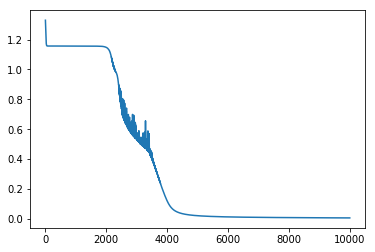

In [98]:
model.train(X,y,10000,1e-5,.8)

plt.plot(model.error)

In [99]:
model.predict(X)
(model.predictions==y).mean()*100

99.84126984126985

In [79]:
model.predictions

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [82]:
np.argmax(model.probabilities, axis=1)

array([3, 3, 3, ..., 3, 3, 3])

In [83]:
y

array([[2.],
       [1.],
       [0.],
       ...,
       [3.],
       [0.],
       [3.]])